# Analyse des Données en Trois Phases

## 1. Première Partie : Données avec Dépendances Temporelles Cours et Saisonnières
Dans cette première phase, nous travaillerons sur des données présentant des **dépendances temporelles courtes** et des **caractéristiques saisonnières**. Cela signifie que les relations entre les observations sont limitées dans le temps, et il existe des motifs récurrents en fonction de la saisonnalité (par exemple, des variations annuelles, mensuelles ou hebdomadaires).

### Objectifs :
- Identifier les motifs saisonniers sur des périodes courtes.
- Appliquer des modèles capables de capturer des dépendances temporelles limitées dans le temps.
  
## 2. Deuxième Partie : Données avec Longues Dépendances Temporelles et Saisonnières
La deuxième phase consiste à travailler avec des données possédant des **dépendances temporelles longues**, combinées à des effets **saisonniers**. Dans ce cas, les relations entre les observations peuvent s'étendre sur une période beaucoup plus longue, nécessitant des modèles plus complexes pour en saisir les dynamiques.

### Objectifs :
- Capturer et modéliser les dépendances à long terme.
- Analyser les interactions entre les tendances saisonnières et les longues séries temporelles.

## 3. Troisième Partie : Données Sans Saisonnière
Dans la dernière phase, l'objectif est d'analyser des données ne présentant aucune **saisonnière** évidente. Cette partie se concentre sur des séries temporelles où les variations sont principalement influencées par des facteurs non saisonniers, comme des tendances ou des événements ponctuels.

### Objectifs :
- Identifier les tendances sous-jacentes dans les séries temporelles.
- Appliquer des modèles adaptés à des données sans saisonnalité.


---

# 1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
data = pd.read_csv(
    r'C:\Users\khali\OneDrive\Bureau\S6\ATSA&NN\ice_cream.csv', 
    index_col=0,  # Rend la première colonne comme index
    parse_dates=[0]  # Interprète la première colonne comme des dates
)

In [5]:
data.sample(10)

,IPN31152N
DATE,
2017-06-01,123.0870
1980-06-01,108.4666
2016-03-01,116.1793
1983-03-01,86.6512
1986-10-01,86.4120
1988-11-01,87.7763
2000-12-01,88.5149
1993-04-01,140.7597
1992-06-01,158.2887


# 1. Observation Traitement,(Visualisation statstiques descriptiveses)

In [5]:
data.rename(columns={'IPN31152N': 'SALES'}, inplace=True)

In [10]:
data.head()

,SALES
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


### Vérification et Conversion des Dates dans un Dataset avec Pandas

Lors de l'importation de données contenant des dates, Pandas peut automatiquement les interpréter comme des objets `datetime`.  

#### Cas 1 : Les dates sont déjà bien formatées  
Si les dates sont correctement reconnues lors du chargement des données, aucune action supplémentaire n'est nécessaire.

#### Cas 2 : Les dates ne sont pas bien formatées  
Dans ce cas, nous devons les parser manuellement en spécifiant un **parseur de date** personnalisé. Voici comment procéder :

```python
from datetime import datetime
import pandas as pd

# Définition de la fonction de parsing des dates
def parser(s):
    return datetime.strptime(s, "%Y-%m-%d")  # Conversion de la chaîne en datetime
# s peut etre comme ça (2024-02-10,5.2) donc comme resultat on aura :"2024-02-10"
# Chargement du fichier CSV avec conversion explicite des dates
data = pd.read_csv(
    "fichier.csv",  
    parse_dates=[0],  
    index_col=[0],   
    date_parser=parser  # Utilisation de la fonction de parsing personnalisée
)
#Lorsque tu utilises date_parser=parser dans pd.read_csv(), Pandas applique la fonction parser() à chaque valeur de la colonne spécifiée dans parse_dates=[0].


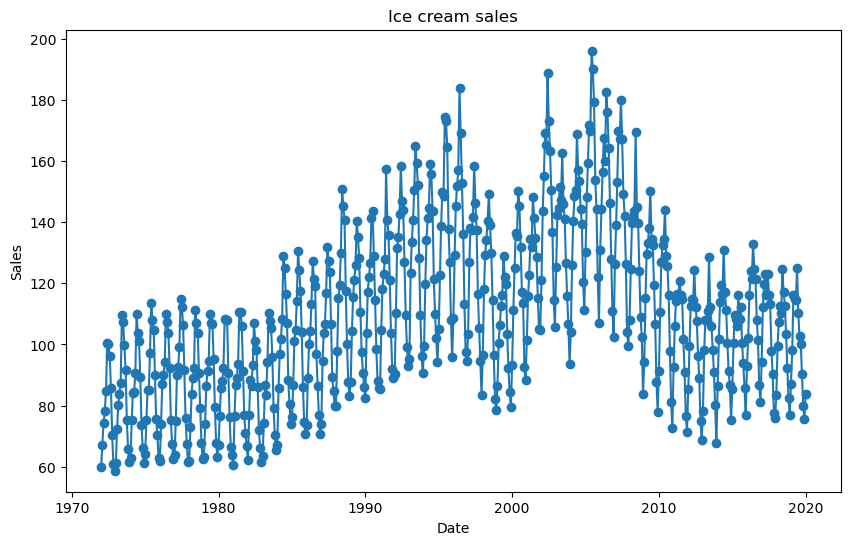

In [13]:
plt.figure(figsize=(10,6))
plt.plot(data.index,data.SALES,marker='o',linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Ice cream sales')
plt.show()

### Inférer la Fréquence des Données dans une Série Temporelle

Lorsqu'une série temporelle n'a pas une fréquence clairement définie, il est recommandé d'utiliser `pandas.infer_freq()` pour déterminer automatiquement l'intervalle entre les observations.

#### Problème :
Si la série temporelle ne possède pas d'information explicite sur sa fréquence, certaines opérations comme la rééchantillonnage (`resampling`), l'interpolation ou les prévisions peuvent être impactées.

#### Solution :
Nous pouvons inférer la fréquence (déterminer automatiquement l'intervalle de temps entre les observations d'une série temporelle) des données et l'appliquer à la série à l'aide de `asfreq()` :

In [15]:
data = data.asfreq(pd.infer_freq(data.index))
print(data.index.freq)

<MonthBegin>


In [16]:
start_data=pd.to_datetime('2010-01-01')
data1=data[start_data:]
data1.tail()

,SALES
DATE,
2019-09-01,100.1741
2019-10-01,90.1684
2019-11-01,79.7223
2019-12-01,75.7094
2020-01-01,83.6290


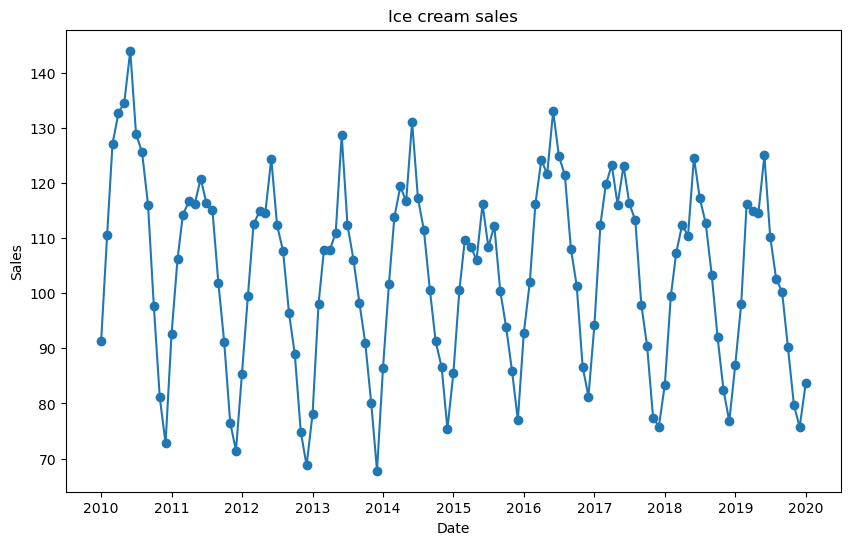

In [18]:
plt.figure(figsize=(10,6))
plt.plot(data1,marker='o',linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Ice cream sales')
plt.show()

##  • Statistiques descriptives :

In [22]:
# data.describe()
from statsmodels.stats.descriptivestats import describe
describe(data1)

,SALES
nobs,121.000000
missing,0.000000
mean,103.607036
std_err,1.537698
upper_ci,106.620869
lower_ci,100.593203
std,16.914680
iqr,25.138300
iqr_normal,18.635050
mad,14.253771


## 📊 Résumé Statistique des Données

La fonction `describe(data)` de `statsmodels.stats.descriptivestats` fournit un résumé statistique des données, comprenant plusieurs indicateurs clés.

### ⚠  Principales métriques :

- **nobs** : Nombre d'échantillons (n observations).
- **mean** : Moyenne des valeurs.
- **std** : Écart-type, mesure de dispersion.
- **min** : Valeur minimale de l’échantillon.
- **max** : Valeur maximale de l’échantillon.
- **range** : Étendue des valeurs (max - min).
- **skew** : Asymétrie de la distribution.
- **kurtosis** : Coefficient d’aplatissement de la distribution.
 ____________________________________________________________________

# • Analyse de la distribution :

## 📊 Calcul du Nombre de Bins

Le choix du nombre de bins pour un histogramme peut se faire à l'aide de plusieurs méthodes statistiques :

### 🔹 1. Méthode de Sturges  
La méthode de Sturges est basée sur le logarithme du nombre d'échantillons :  

$$
k = 1 + \log_2(n)
$$

Avec **\( n = 121 \)** :  

$$
k = 1 + \log_2(121) = 7.918
$$

---

### 🔹 2. Méthode de Freedman-Diaconis  
Cette méthode utilise l'étendue et l'intervalle interquartile (IQR) pour déterminer la largeur des bins :  

$$
k = \frac{\text{étendue}}{\text{largeur des bins}}
$$

Avec :

$$
\text{largeur des bins} = \frac{2 \times IQR}{n^{1/3}}
$$

Données :
- **\( \text{min} = 67.803100 \)**
- **\( \text{max} = 143.951900 \)**
- **\( IQR = 25.1383 \)** , "IQR represente l'étendue des valeurs situées entre Q1=25% et Q3=75%"

Alors :

$$
k = \frac{(143.951900 - 67.803100)}{2 \times \frac{25.1383}{(121)^{1/3}}} = 7.49133
$$

---

### 🔹 3. Méthode de Scott  
La méthode de Scott est basée sur l'écart-type des données :

$$
k = \frac{\text{étendue}}{3.5 \times \frac{\sigma}{n^{1/3}}}
$$

Avec :
- **\( \sigma = 16.914680 \)**
- **\( \text{étendue} = 76.148800 \)**

On obtient :

$$
k = \frac{76.148800}{3.5 \times \frac{16.914680}{(121)^{1/3}}} = 6.362
$$

---

### 📌 Conclusion :
- **Sturges** : \( k \approx 7.92 \)
- **Freedman-Diaconis** : \( k \approx 7.49 \)
- **Scott** : \( k \approx 6.36 \)

Ces méthodes permettent d'adapter le nombre de bins en fonction de la distribution des données.


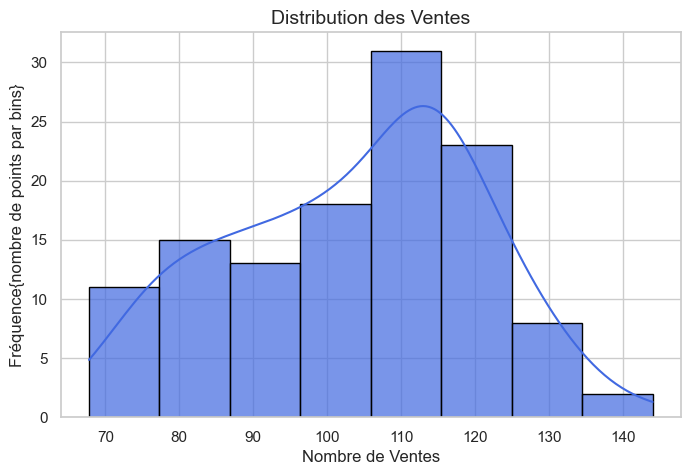

In [27]:
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(data1['SALES'], kde=True, bins=8, color="royalblue", alpha=0.7, edgecolor="black")
plt.title("Distribution des Ventes", fontsize=14)
plt.xlabel("Nombre de Ventes", fontsize=12)
plt.ylabel("Fréquence{nombre de points par bins}", fontsize=12)
plt.show()

## 📊 Calcul de Densité dans un Histogramme

La hauteur de chaque bin, appelée **densité** ou **fréquence**, est donnée par la formule :

$$ D = \frac{\text{nombre de points dans le bin}}{n \times w} $$

où :
- $D$ est la densité du bin
- $n$ est le nombre total d'échantillons ($\text{len(echantillons)}$)
- $w$ est la largeur du bin

### 🔹 Exemple de calcul :

Nous allons calculer la densité du bin contenant le plus grand nombre de points dans notre distribution.

**Données :**
- Nombre total d'échantillons: $n = 121$
- Largeur du bin: $w = \frac{76.1488}{8}$
- Le bin s'étend de $(67.803100 + 4 \times \frac{76.1488}{8})$ à $(67.803100 + 5 \times \frac{76.1488}{8})$

**Calcul du nombre de points dans ce bin :**

```python
k = 0
for i in data['SALES']:
    if (67.803100 + 4*(76.1488/8)) < i and i < (67.803100 + 5*(76.1488/8)):
        k += 1
print(k)  # k = 31 (exactement celle indiquée sur la figure au dessus)
```
🔍 Interprétation :
La densité de 0.0269 signifie que, pour ce bin particulier, nous avons environ 2.69% des observations par unité de largeur du bin. Cela correspond au bin qui contient la concentration la plus élevée de nos données.

### 📊 Vérification de la Normalité avec la Règle Empirique (68-95-99.7)

La **règle empirique** (ou **règle des 68-95-99.7**) permet de vérifier si une distribution suit une **loi normale** en analysant la répartition des données autour de la moyenne.

#### 🔹 Conditions à vérifier :
- **68%** des données doivent appartenir à l’intervalle :  
  $$
  [ \mu - \sigma, \mu + \sigma ]
  $$
- **95%** des données doivent appartenir à l’intervalle :  
  $$
  [ \mu - 2\sigma, \mu + 2\sigma ]
  $$
- **99.7%** des données doivent appartenir à l’intervalle :  
  $$
  [ \mu - 3\sigma, \mu + 3\sigma ]
  $$

#### 🔹 Étapes de vérification :
1. Calculer la **moyenne** \( \mu \) et l'**écart-type** \( \sigma \).
2. Déterminer les intervalles définis par la règle empirique.
3. Calculer le **pourcentage des données** contenues dans chaque intervalle.
4. Comparer ces pourcentages aux valeurs théoriques attendues.

#### 📌 Interprétation :
- **Si les pourcentages observés sont proches de 68%, 95% et 99.7%**, la distribution **peut être considérée comme normale**.
- **Sinon, il peut s'agir d'une distribution asymétrique ou ayant des queues épaisses (kurtosis élevée).**




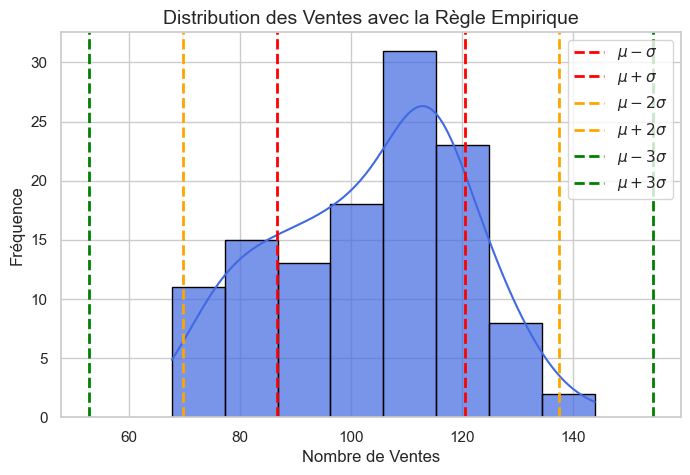

Proportion des données dans [μ - σ, μ + σ] : 0.6281 (Attendu : ~0.68)
⚠️ La distribution ne semble pas parfaitement normale.


In [30]:
mean = data1['SALES'].mean()
std = data1['SALES'].std()


sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))

sns.histplot(data1['SALES'], kde=True, bins=8, color="royalblue", alpha=0.7, edgecolor="black")

plt.axvline(mean - std, color='red', linestyle='dashed', linewidth=2, label=r'$\mu - \sigma$')
plt.axvline(mean + std, color='red', linestyle='dashed', linewidth=2, label=r'$\mu + \sigma$')

plt.axvline(mean - 2*std, color='orange', linestyle='dashed', linewidth=2, label=r'$\mu - 2\sigma$')
plt.axvline(mean + 2*std, color='orange', linestyle='dashed', linewidth=2, label=r'$\mu + 2\sigma$')

plt.axvline(mean - 3*std, color='green', linestyle='dashed', linewidth=2, label=r'$\mu - 3\sigma$')
plt.axvline(mean + 3*std, color='green', linestyle='dashed', linewidth=2, label=r'$\mu + 3\sigma$')

plt.title("Distribution des Ventes avec la Règle Empirique", fontsize=14)
plt.xlabel("Nombre de Ventes", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.legend()
plt.show()

n = len(data1['SALES'])
inside_1std = ((data1['SALES'] >= (mean - std)) & (data1['SALES'] <= (mean + std))).sum() / n

print(f"Proportion des données dans [μ - σ, μ + σ] : {inside_1std:.4f} (Attendu : ~0.68)")

if np.isclose(inside_1std, 0.68, atol=0.05):
    print("✅ La distribution suit approximativement une loi normale selon la règle empirique.")
else:
    print("⚠️ La distribution ne semble pas parfaitement normale.")


# un petit cadeau pour bien comprendre ces discriptions

C:\Users\khali\AppData\Local\Temp\ipykernel_22888\4275365707.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


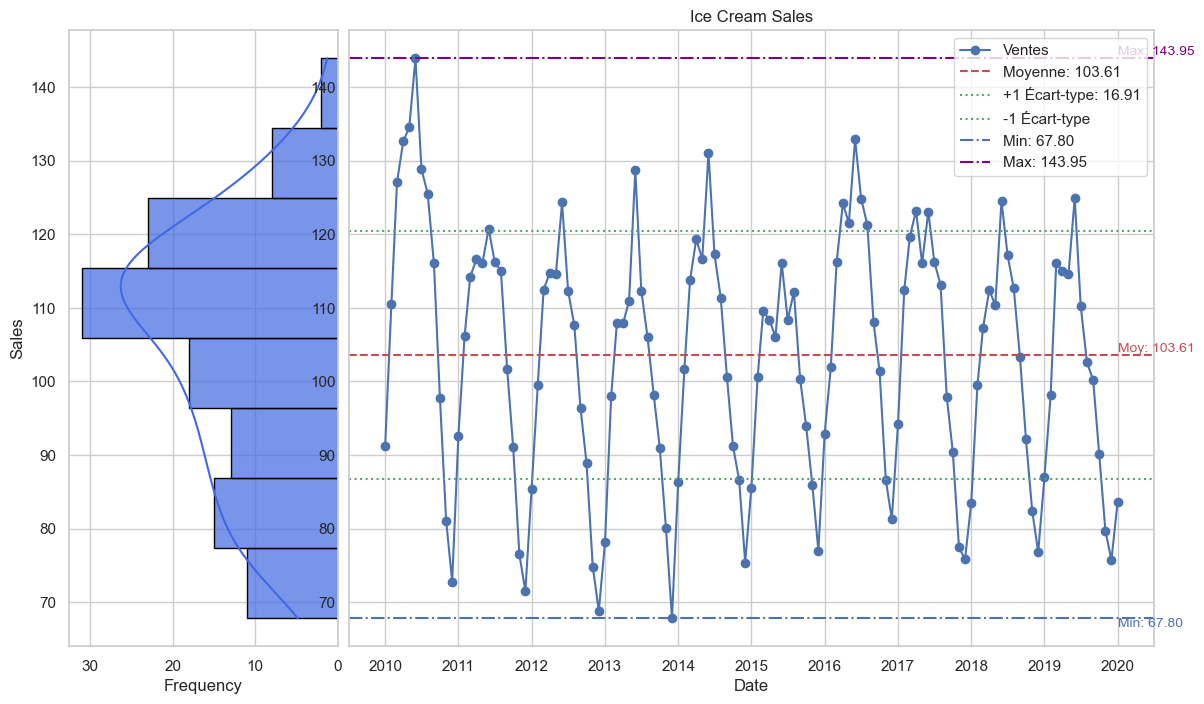

In [32]:

from matplotlib.gridspec import GridSpec

# Calcul des statistiques
mean_value = data1['SALES'].mean()
std_value = data1['SALES'].std()
min_value = data1['SALES'].min()
max_value = data1['SALES'].max()

# Création de la figure
fig = plt.figure(figsize=(14, 8))

# Création de GridSpec avec 2 colonnes
gs = GridSpec(1, 2, width_ratios=[1, 3], wspace=0.02)

# Création du sous-plot pour l'histogramme vertical (à gauche)
ax_hist = fig.add_subplot(gs[0])
sns.histplot(y=data1['SALES'], kde=True, bins=8, color="royalblue", 
             alpha=0.7, edgecolor="black", ax=ax_hist, orientation='horizontal')
ax_hist.set_ylabel('Sales')
ax_hist.set_xlabel('Frequency')
ax_hist.invert_xaxis()  # Inverse l'axe x pour que l'histogramme pointe vers la gauche

# Création du sous-plot principal pour le graphique linéaire (à droite)
ax_main = fig.add_subplot(gs[1], sharey=ax_hist)  # Partage l'axe y avec l'histogramme
ax_main.plot(data1.index, data1['SALES'], marker='o', linestyle='-', label='Ventes')

# Ajout des lignes indicatrices sur le graphique principal
ax_main.axhline(mean_value, color='r', linestyle='--', label=f'Moyenne: {mean_value:.2f}')
ax_main.axhline(mean_value + std_value, color='g', linestyle=':', label=f'+1 Écart-type: {std_value:.2f}')
ax_main.axhline(mean_value - std_value, color='g', linestyle=':', label=f'-1 Écart-type')
ax_main.axhline(min_value, color='b', linestyle='-.', label=f'Min: {min_value:.2f}')
ax_main.axhline(max_value, color='purple', linestyle='-.', label=f'Max: {max_value:.2f}')

# Ajout des annotations sur le graphique principal
ax_main.text(data1.index[-1], mean_value, f'Moy: {mean_value:.2f}', color='r', fontsize=10, verticalalignment='bottom')
ax_main.text(data1.index[-1], max_value, f'Max: {max_value:.2f}', color='purple', fontsize=10, verticalalignment='bottom')
ax_main.text(data1.index[-1], min_value, f'Min: {min_value:.2f}', color='b', fontsize=10, verticalalignment='top')

# Paramètres du graphique principal
ax_main.set_xlabel('Date')
ax_main.set_ylabel('')  # On enlève le label de l'axe y car il est déjà sur l'histogramme
ax_main.set_title('Ice Cream Sales')
ax_main.legend()
ax_main.grid(True)

# Masquer les étiquettes de l'axe y sur l'histogramme si vous le souhaitez
# ax_hist.set_yticks([])

# Affichage
plt.tight_layout()
plt.show()

# 2. Analyse de stationnarité  (Tests ADF, KPSS, PP)

## 📊  Test de Dickey-Fuller

### 🔹 Modèle AR(1) :
Le modèle de série temporelle que nous étudions est défini par l'équation :

$$
y_t = q \cdot y_{t-1} + \epsilon_t
$$

Ce modèle peut être réécrit sous la forme :

$$
y_t = q^t \cdot y_0 + \sum_{k=0}^{t-1} q^k \cdot \epsilon_{t-k}
$$


Où :
- yt : valeur de la série à l'instant t
- q : paramètre d'autocorrélation
- εt : bruit blanc (résidu aléatoire)
- y0 : condition initiale

### 🔹 Calcul de l'Espérance et de la Variance :

#### 2.1 Espérance

Sous l'hypothèse que εt a une espérance nulle :

$$
   E(y_t) = E\left(q^t \cdot y_0 + \sum_{k=0}^{t-1} q^k \cdot \epsilon_{t-k}\right) = q^t \cdot y_0
$$

#### 2.2 Variance

Pour des erreurs indépendantes et identiquement distribuées de variance σ² :

$$
   \text{Var}(y_t) = \sigma^2 \left(q^0 + q^2 + q^4 + \dots + q^{2(t-1)}\right)
   $$
Cela peut être simplifié en utilisant la formule d'une somme géométrique :

   $$
   \text{Var}(y_t) = \sigma^2 \cdot \frac{1 - q^{2t}}{1 - q^2}
   $$
### 3. Analyse de la Stationnarité

#### 3.1 Conditions de Stationnarité

La stationnarité de la série dépend de la valeur de q :

1. **|q| < 1** (Série stationnaire)
   - E(yt) = 0
   - Var(yt) = σ²/(1 - q²) (constante)

2. **|q| > 1** (Série non stationnaire)
   - E(yt) → ∞
   - Var(yt) → ∞

3. **|q| = 1** (Série non stationnaire)
   - E(yt) = y0
   - Var(yt) → ∞

## 4. Test de Dickey-Fuller

### 4.1 Formulation du Test

Le test se base sur la transformation :

$$
\Delta y_t = (q - 1) \cdot y_{t-1} + \epsilon_t
$$

Ou

$$
\Delta y_t = Q \cdot y_{t-1} + \epsilon_t
$$

### 4.2 Hypothèses

- H0 (hypothèse nulle) : Q = 0 (série non stationnaire)
- H1 (hypothèse alternative) : Q < 0 (série stationnaire)

### 4.3 Statistique de Test

$$
t_{\hat{\alpha}} = \frac{\hat{\alpha}}{se(\hat{\alpha})}
$$

Où :
- α̂ : estimation de Q
- se(α̂) : erreur standard de α̂

### 4.4 Valeurs Critiques

| Niveau de Signification | Valeur Critique |
|------------------------|-----------------|
| 1%                     | -3.43           |
| 5%                     | -2.86           |
| 10%                    | -2.57           |

## 5. Application Pratique

### 5.1 Exemple Numérique

Paramètres :
- α̂ = -1.5
- se(α̂) = 0.5

Calcul :

$$
t_{\hat{\alpha}} = \frac{-1.5}{0.5} = -3.0
$$

### 5.2 Interprétation

Pour un seuil de 5% (valeur critique = -2.86) :
- tα = -3.0 < -2.86
- Conclusion : Rejet de H0, la série est stationnaire

## 6. Règle de Décision

La série est considérée comme :
- Stationnaire si tα ≤ valeur critique
- Non stationnaire si tα > valeur critique

## 7. Résumé

- La stationnarité dépend de la valeur absolue de q
- Le test de Dickey-Fuller fournit un cadre statistique rigoureux
- L'interprétation se fait via la comparaison avec les valeurs critiques

## 📊  Test de KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

## 1. Fondements Théoriques

### 1.1 Modèle de Base

La série temporelle est modélisée par :

$$
y_t = \mu + r_t + \epsilon_t
$$

où :
- yt est la série temporelle
- μ est la moyenne
- rt est le terme de tendance aléatoire
- εt est le terme d'erreur

### 1.2 Hypothèses du Test

L'hypothèse repose sur la variance du terme d'erreur dans l'équation :

$$
r_t = q r_{t-1} + \epsilon_t
$$

- **H0 (hypothèse nulle)** : σ² = 0 (série stationnaire)
  - rt reste constant
- **H1 (hypothèse alternative)** : σ² > 0 (série non stationnaire)
  - rt présente une variance croissante

## 2. Calcul de la Statistique KPSS

### 2.1 Formule Principale

$$
KPSS = \frac{1}{T^2 \hat{\sigma}^2} \sum_{t=1}^{T} S_t^2
$$

où :
- T est la taille de l'échantillon
- St est la somme cumulative des résidus
- σ̂² est la variance à long terme des résidus

### 2.2 Somme Cumulative des Résidus

$$
S_t = \sum_{i=1}^{t} \hat{e}_i
$$

#### Importance de St
- Série stationnaire : St reste stable
- Série non stationnaire : St augmente avec le temps

### 2.3 Variance à Long Terme

$$
\hat{\sigma}^2 = \frac{1}{T} \sum_{t=1}^{T} e_t^2 + 2 \sum_{j=1}^{m} w_j \left( \frac{1}{T} \sum_{t=j+1}^{T} e_t e_{t-j} \right)
$$

Composantes :
1. Variance échantillonnale : $\frac{1}{T} \sum_{t=1}^{T} e_t^2$
2. Autocovariances pondérées
3. Poids du noyau de Bartlett (wj)

## 3. Analyse de la Stationnarité

### 3.1 Caractéristiques

Pour rt :
- **Stationnaire** : variance σ̂² stable dans le temps
- **Non stationnaire** : variance croissante indéfiniment

### 3.2 Interprétation Statistique

Règles de décision basées sur la p-value :
- p-value < 0.05 : Rejet de H0 (série non stationnaire)
- p-value > 0.05 : Non rejet de H0 (série stationnaire)

### 3.3 Critères de Décision

La série est considérée comme :
- **Stationnaire** si tα ≤ valeur critique
- **Non stationnaire** si tα > valeur critique

## 4. Points Clés à Retenir

1. Le test KPSS examine la stabilité de la variance
2. La somme cumulative des résidus (St) est un indicateur clé
3. La variance à long terme prend en compte les autocovariances
4. L'interprétation se base sur la p-value ou les valeurs critiques

In [154]:
#Le test d'Augmented Dickey-Fuller (ADF) est une version étendue du test de Dickey-Fuller (DF),
#avec l'ajout d'un terme de sommation des différences de delta y_t-1 mais le principe de base du test de Dickey-Fuller reste largement appliqué.
from statsmodels.tsa.stattools import adfuller, kpss #,phillips_perron
def Stationnarite_test_adf(data):
    result=adfuller(data)
    print('ADF Statistic : %f' % result[0])
    print('p-value :%f'%result[1]) 
    print('Critical Values:')
    for key, value in result[4].items():
       print('\t%s: %.3f' % (key, value))

def Stationnarite_test_kpss(data):
    result=kpss(data, regression='c')  # Le test peut être 'c' pour une stationnarité autour d'une constante, 
                                         # 't' pour une stationnarité autour d'une tendance linéaire, et 'ct' pour une stationnarité autour d'une constante et tendance linéaire
    print('KPSS Statistic : %f' % result[0])
    print('p-value :%f'%result[1]) 
    print('Critical Values:')
    for key, value in result[3].items():
              print('\t%s: %.3f' % (key, value))
#def Stationnarite_test_pp(data):
    #result=phillips_perron(data)
    #print('Phillips-Perron Statistic : %f' % result[0])
    #print('p-value :%f'%result[1]) 

In [38]:
Stationnarite_test_adf(data1)

ADF Statistic : -3.469207
p-value :0.008814
Critical Values:
	1%: -3.493
	5%: -2.889
	10%: -2.581


• On constate que l'**ADF Statistic** est inférieur ou égal à la valeur critique à 5% (\(-2.889\)), ce qui nous permet de **rejeter l'hypothèse nulle** et conclure que la série est **stationnaire**. 

• Alternativement, puisque la **p-value** est inférieure ou égale à \(0.05\), cela confirme également que la série est **stationnaire**.


In [40]:
Stationnarite_test_kpss(data1)

KPSS Statistic : 0.092489
p-value :0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\khali\AppData\Local\Temp\ipykernel_22888\493224427.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result=kpss(data, regression='c')  # Le test peut être 'c' pour une stationnarité autour d'une constante,


- On constate que la **statistique KPSS** est inférieure ou égale à la valeur critique à 5% (\(0.463\)), ce qui nous permet de **ne pas rejeter l'hypothèse nulle** et de conclure que la série est **stationnaire**.

- Alternativement, puisque la **p-value** est supérieure à \(0.05\), cela confirme également que la série est **stationnaire**.


 # 3. Analyse de la structure temporelle (ACF, PACF, décomposition)

# 📈 Décomposition d'une Série Temporelle

## 🎯 Principe Fondamental

Une série temporelle $y_t$ peut être décomposée en trois composantes principales selon le modèle additif :

$$ y_t = T_t + S_t + e_t $$

Où :
- $T_t$ représente la **tendance** (évolution à long terme)
- $S_t$ représente la **saisonnalité** (variations cycliques à intervalle régulier)
- $e_t$ représente les **résidus** (fluctuations aléatoires, généralement un bruit blanc gaussien)

## 🎯 Objectifs de la Décomposition

La décomposition permet de :
1. Comprendre la structure sous-jacente de la série
2. Analyser séparément chaque composante
3. Améliorer les prévisions futures
4. Identifier des anomalies ou des changements structurels

## 🛠️ Méthode de Décomposition avec Python

### 🔹1. Méthode classique : `seasonal_decompose` de statsmodels



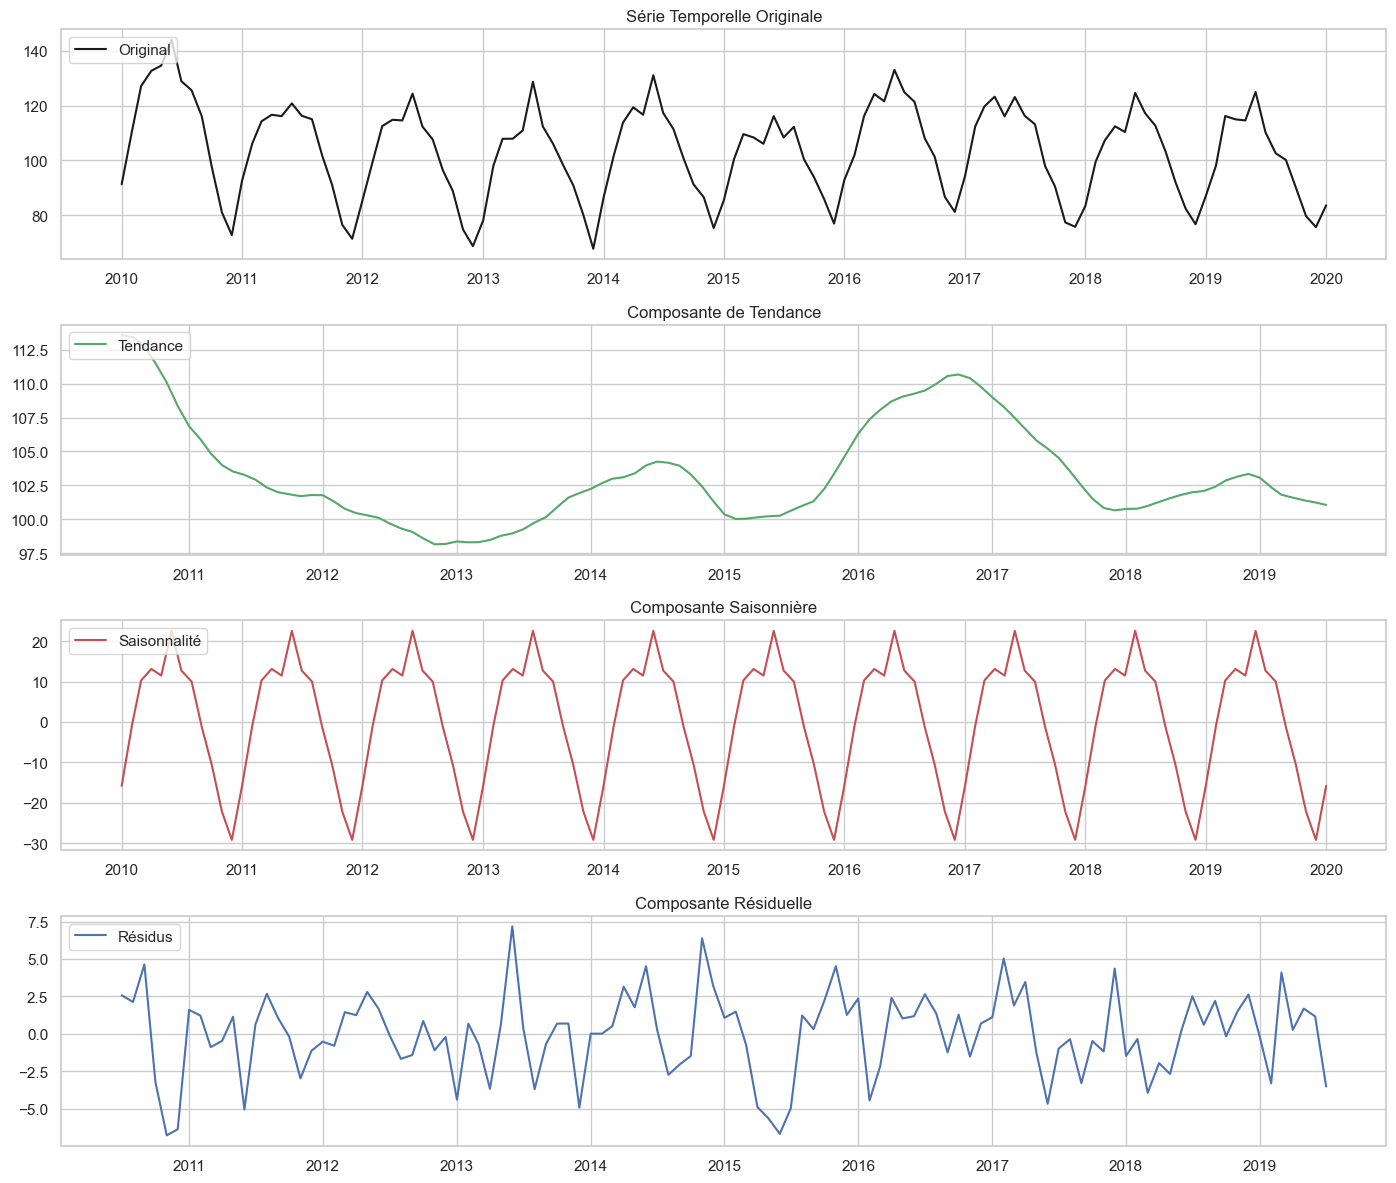

In [45]:

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt



# Décomposition de la série
decomposition = seasonal_decompose(data1['SALES'], 
                                  model='additive',  # ou 'multiplicative'
                                  period=12)  # période de saisonnalité (à partir de cette resultat "<MonthBegin>" si vous rapplez)

# Extraction des composantes
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Visualisation
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 12))

# Série originale
ax1.plot(data1['SALES'], 'k', label='Original')
ax1.legend(loc='upper left')
ax1.set_title('Série Temporelle Originale')

# Tendance
ax2.plot(trend, 'g', label='Tendance')
ax2.legend(loc='upper left')
ax2.set_title('Composante de Tendance')

# Saisonnalité
ax3.plot(seasonal, 'r', label='Saisonnalité')
ax3.legend(loc='upper left')
ax3.set_title('Composante Saisonnière')

# Résidus
ax4.plot(residual, 'b', label='Résidus')
ax4.legend(loc='upper left')
ax4.set_title('Composante Résiduelle')

plt.tight_layout()
plt.show()

## 2. Méthode avancée : Décomposition STL (Seasonal and Trend decomposition using Loess)

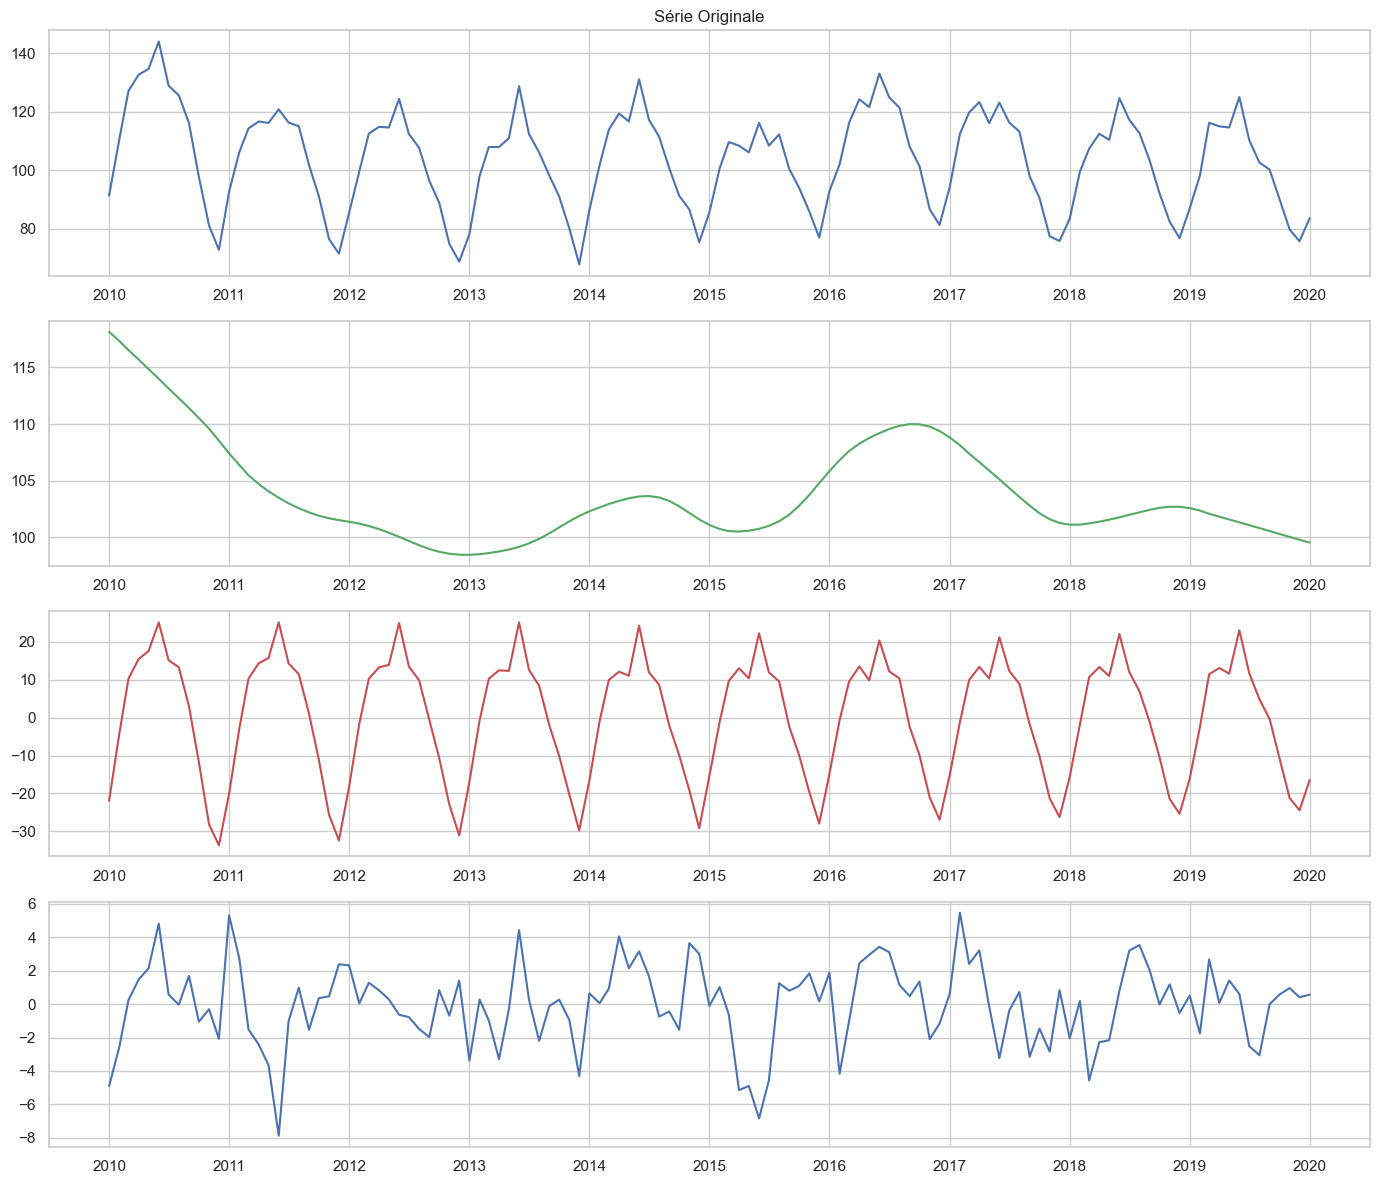

In [48]:
from statsmodels.tsa.seasonal import STL

# Décomposition STL (plus flexible que seasonal_decompose)
stl = STL(data1['SALES'], 
          period=12,  # période saisonnière
          trend=None)  # laisse le modèle déterminer automatiquement
res = stl.fit()

# Visualisation
fig, axes = plt.subplots(4, 1, figsize=(14, 12))
axes[0].plot(data1['SALES'])
axes[0].set_title('Série Originale')
axes[1].plot(res.trend, 'g', label='Tendance')
axes[2].plot(res.seasonal, 'r', label='Saisonnalité')
axes[3].plot(res.resid, 'b', label='Résidus')
plt.tight_layout()
plt.show()

## 📊 Analyse des Graphiques ACF et PACF



### 🔹 Introduction  

L'**Autocorrelation Function (ACF)** et la **Partial Autocorrelation Function (PACF)** sont des outils essentiels pour analyser les dépendances temporelles d'une série. Elles permettent d'identifier si une série est stationnaire et d'aider au choix du modèle pour la modélisation (ARIMA, etc.).  



### 🔹 1. Fonction d'Autocorrélation (ACF)

L'ACF mesure la corrélation entre une observation et ses valeurs décalées (*lags*). Elle est définie comme suit :

$$
p(k) = \frac{\alpha(k)}{\alpha(0)}
$$

📌 **Propriétés :**  

- α(k)=Cov(y_t,y_t−k)=E[(y_t−μ)(y_t−k−μ)]
- p(0) = 1  (une série est parfaitement corrélée avec elle-même).  
- p(k) = p(-k) → **Symétrie** par rapport à l'axe des ordonnées.  
- L'autocorrélation  p(k) est une normalisation de l'autocovariance α(k), où \( k \) représente le décalage (*lag*).
-  **Pourquoi Normaliser l'Autocovariance ?**
  
     •l'Autocovariance α(k) mesure la relation linéaire entre les valeurs d'une série à deux instants différents t et t−k. Elle dépend de la variance des deux séries, donc de l'unité de mesure de la série, ce qui rend difficile la comparaison directe entre différentes séries.

     •l'Autocorrélation p(k), en revanche, est une version "normalisée" de l'autocovariance. Elle élimine l'effet de la variance des séries et rend la mesure sans dimension.


### 🔹 2. Comment cette normalisation est faite

**Inégalité de Cauchy-Schwarz**

L'inégalité de Cauchy-Schwarz (ou inégalité de Cauchy-Schwarz en statistique) est une propriété fondamentale qui nous aide à comprendre pourquoi \( p(k) \) reste entre \(-1\) et \(1\). 

L'inégalité de Cauchy-Schwarz stipule que pour deux variables aléatoires \( X \) et \( Y \), la covariance Cov(X,Y) satisfait :

$$
|\text{Cov}(X, Y)| \leq \sqrt{\text{Var}(X) \times \text{Var}(Y)}
$$

Appliquée à notre série temporelle \( y_t \), cela donne :

$$
|\alpha(k)| = |\text{Cov}(y_t, y_{t-k})| \leq \sqrt{\alpha(0) \times \alpha(0)} = \alpha(0)
$$

Donc, l'autocovariance  l'autocovariance α(k) est toujours inférieure ou égale à la variance 
α(0). Cela

$$
|\alpha(k)| \leq \alpha(0)
$$

Cela implique que, lorsqu'on normalise par la variance, on obtient :

$$
|p(k)| = \left| \frac{\alpha(k)}{\alpha(0)} \right| \leq 1
$$




### 🔹 3. Interprétation de l'ACF  

📌 **Si p(k)  décroît rapidement vers 0 :**  
✅ **Pas de dépendance à long terme**  
✅ **La série est stationnaire** → Elle a une mémoire courte

#### Comment je comprends cela : je vais vous donner un exemple pour l'illustrer :
Imaginez un jeune homme ivre avec ses amis. À un moment donné, il regarde la table et, en colère, il dit : "Les gars, où est mon téléphone ?". Il vérifie sa poche et trouve son téléphone, puis il dit : "Ah, il est là". Quelques instants plus tard, il refait exactement le même geste, cherchant à nouveau son téléphone, et ainsi de suite.

Cet exemple illustre une **mémoire courte**, car l'action qu'il fait à chaque fois (chercher son téléphone) est la même et ne dépend pas de ses actions précédentes. Chaque geste est indépendant des autres, tout comme une série temporelle stationnaire où les observations passées n'affectent pas les futures. La stationnarité implique qu'il n'y a pas de dépendance à long terme, et les comportements (ou les valeurs) à un moment donné sont similaires à ceux à d'autres moments.


 


### 🔹 4. Fonction d'Autocorrélation Partielle (PACF)  

La **PACF** mesure la corrélation entre  y_t  et  y_{t-k} , **en éliminant l'influence des lags intermédiaires**. Elle est utile pour identifier le **terme autorégressif**  p  d'un modèle **AR(p)**.

📌 **Interprétation du PACF :**  
- Si la PACF coupe rapidement après un certain lag **k**, cela suggère un modèle **AR(k)**.  
- Si la PACF décroît lentement, cela peut indiquer une structure plus complexe, nécessitant une transformation de la série.  



## 🔹 5. Tracé des Graphiques ACF et PACF avec `statsmodels`


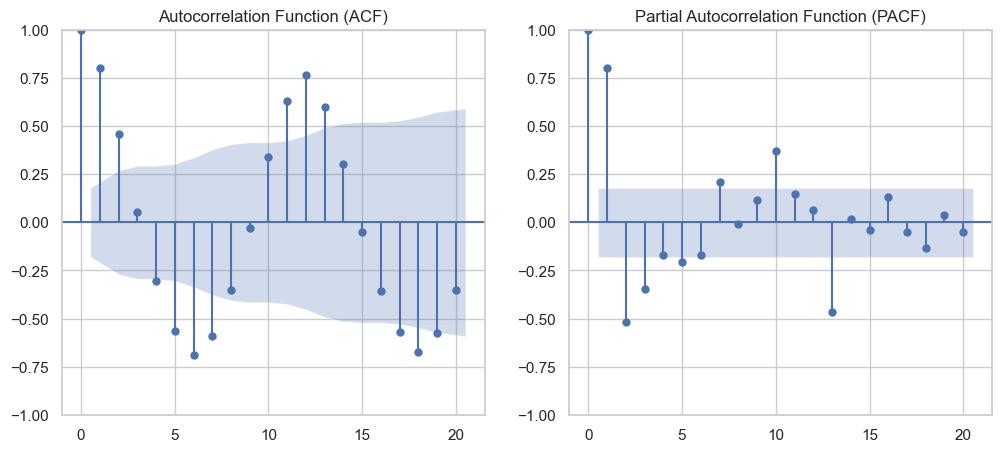

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Tracé des graphiques ACF et PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(data1, ax=axes[0], lags=20)
axes[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(data1, ax=axes[1], lags=20)
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.show()

### Interprétation des résultats de l'ACF et PACF

#### ACF (Autocorrelation Function) :
- Dans la marge de 20 lags, on observe que la série décroît rapidement vers 0 juste après le 4ème lag. Cela signifie qu'il n'y a pas de dépendance à long terme dans les données.
- Cette observation suggère que la série est **stationnaire**, car les autocorrélations à des lags plus grands deviennent négligeables, ce qui indique que la série n'a pas de tendance persistante au fil du temps.

#### PACF (Partial Autocorrelation Function) :
- On constate une chute nette à \( k = 8 \), ce qui signifie qu'une **AR(8)** (modèle autorégressif d'ordre 8) serait le meilleur modèle pour décrire la structure de la série.
- Cette chute indique que l'autocorrélation partielle à \( k = 8 \) est significative, mais les autocorrélations pour des lags plus grands ne le sont pas. Cela suggère un modèle autorégressif simple avec un seul retard significatif.
---

# 4. Modélisation

### 🎯 Choix du modèle

- **Pour une série stationnaire** :  
  On envisage des modèles **AR**, **MA** ou **ARMA**. Ces modèles sont adaptés lorsque la série est stationnaire, c'est-à-dire qu'elle n'a pas de tendance à long terme et que ses caractéristiques statistiques sont constantes au fil du temps.

- **Pour une série non stationnaire** :  
  Si la série présente des tendances ou des comportements non stationnaires, on utilise un modèle **ARIMA** (AutoRegressive Integrated Moving Average). Ce modèle permet de rendre la série stationnaire en effectuant une différenciation, ce qui est particulièrement utile lorsque la série présente des tendances à long terme.
  
- **Pour les données saisonnières** :  
  Dans le cas où les données présentent une structure saisonnière, on opte pour un modèle **SARIMA** (Seasonal ARIMA) ou **SARIMAX** (SARIMA avec des variables exogènes). Ces modèles prennent en compte les effets saisonniers dans les données.

### 📌 Application à notre série

Étant donné que notre série est déjà **stationnaire**, il n'est pas nécessaire d'appliquer une transformation comme la différenciation (qui est utilisée dans les modèles ARIMA pour rendre la série stationnaire). Par conséquent, nous allons nous concentrer sur les modèles **AR**, **MA** et **ARMA**.

En revanche, pour illustrer les modèles **ARIMA** et **SARIMA**,on va utiliser la partie **non saisonnière** des données de notre data icecream

---


# Modèles de Séries Temporelles : AR, MA et ARMA

## 1. Modèle AR(p) (AutoRegressif d'ordre p)

Un modèle **AR(p)** s'exprime par l'équation suivante :

$\Large y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \cdots + \phi_p y_{t-p} + \epsilon_t$

### Cas particulier : AR(1)

Pour un modèle **AR(1)**, l'équation se simplifie à :

$\Large y_t = q \cdot y_{t-1} + \epsilon_t$

Avec :
* $q$ : coefficient de régression pour le retard $t-1$
* $\epsilon_t$ : terme d'erreur à l'instant $t$ (bruit blanc)
* $y_t$ : valeur de la série à l'instant $t$

Par récurrence, on peut exprimer $(c'est le MA)y_t$ sous la forme :

$\Large y_t = q^t \cdot y_0 + \sum_{k=0}^{t-1} q^k \cdot \epsilon_{t-k}$

*Note: Pour que le processus soit stationnaire, il faut que* $|q| < 1$

## 2. Modèle MA(q) (Moyenne Mobile d'ordre q)

Un modèle **MA(q)** est défini par :

$\Large y_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q}$

Avec :
* $\mu$ : moyenne de la série
* $\theta_k$ : coefficient pour l'erreur à l'instant $t-k$
* $\epsilon_t$ : innovation (bruit blanc) à l'instant $t$
* $q$ : ordre du modèle MA

*Note: Un processus MA est toujours stationnaire*

## 3. Modèle ARMA(p, q) 

Le modèle **ARMA(p, q)** (AutoRegressif et Moyenne Mobile) combine les caractéristiques des modèles AR et MA :

$\Large y_t = c + \sum_{i=1}^p \phi_i y_{t-i} + \epsilon_t + \sum_{j=1}^q \theta_j \epsilon_{t-j}$

Avec :
* $p$ : ordre de la partie autorégressive
* $q$ : ordre de la partie moyenne mobile
* $\phi_i$ : coefficients AR
* $\theta_j$ : coefficients MA
* $c$ : constante
* $\epsilon_t$ : bruit blanc

*Note: La stationnarité dépend uniquement de la partie AR*

### Conditions de stationnarité :
- Pour AR/ARMA : les racines du polynôme $1 - \phi_1z - \phi_2z^2 - ... - \phi_pz^p = 0$ doivent être à l'extérieur du cercle unité
- Pour MA : toujours stationnaire par constructionne mobile (influence des erreurs passées)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA


 #### 📌 3. Séparation des données en jeu d'entraînement et de test

In [91]:
train_end = '2018-12-31'
test_start = '2019-01-01'
test_end = '2020-01-01'

train_data = data1[:train_end]
test_data = data1[test_start:test_end]
y_train = train_data['SALES']
y_test = test_data['SALES']

**Pourquoi ne pas utiliser train_test_split de Scikit-Learn ?**

La fonction train_test_split est généralement utilisée pour diviser des données aléatoirement, ce qui est utile pour les données indépendantes et identiquement distribuées (IID). Cependant, pour les séries temporelles, l’ordre des observations est crucial car les valeurs futures dépendent des valeurs passées. Une séparation aléatoire casserait la structure temporelle et empêcherait le modèle d’apprendre correctement.

#### 📌 4. Modélisation avec AR, MA et ARMA

In [95]:
AR_model = sm.tsa.AutoReg(y_train, lags=8)
AR_results = AR_model.fit()

ma_model = ARIMA(y_train, order=(0, 0, 16))
ma_results = ma_model.fit()

arma_model = ARIMA(y_train, order=(8, 0, 16))
arma_results = arma_model.fit()

C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### 📌 5. Prévisions pour 2019-2020

In [97]:
forecast_horizon = len(test_data)
ar_forecast = AR_results.forecast(steps=forecast_horizon)
ma_forecast = ma_results.forecast(steps=forecast_horizon)
arma_forecast = arma_results.forecast(steps=forecast_horizon)

 #### 📌 6. Création d’un DataFrame pour stocker les prévisions

In [101]:
forecast_index = pd.date_range(start=test_start, periods=forecast_horizon, freq='MS')
#On crée un index temporel mensuel (MS = Month Start)
forecast_df = pd.DataFrame(index=forecast_index)
forecast_df['AR(8)'] = np.array(ar_forecast)
forecast_df['MA(16)'] = np.array(ma_forecast)
forecast_df['ARMA(8,16)'] = np.array(arma_forecast)

**Pourquoi utiliser np.array() ici ?**

**1.Uniformisation des formats**

Certaines méthodes de prévision (forecast(), get_forecast(), etc.) renvoient des objets qui ne sont pas directement compatibles avec Pandas, comme des listes, séries Pandas ou objets spécifiques de statsmodels.
np.array() garantit que les valeurs sont bien sous forme de tableau NumPy, ce qui évite des erreurs d'alignement ou d'incompatibilité avec Pandas.

**2.Assurer la compatibilité avec Pandas**

forecast_df['AR(8)'] = ar_forecast pourrait poser problème si ar_forecast est un objet complexe (comme une Série Pandas avec un index différent). En le convertissant en tableau NumPy, on force une correspondance stricte entre les indices du DataFrame et les valeurs.

**3.Prévenir d'éventuelles erreurs de type**

Parfois, certaines fonctions de statsmodels retournent des objets non directement indexables par Pandas. L'utilisation de np.array() aide à s'assurer que les données sont bien sous forme de tableau numérique.

Dans notre cas ,si on n'utilise pas cette convertissement on aura un probleme ( des valeurs NaN dans les prévisions ).

#### 📌 7. Ajout des intervalles de confiance pour ARMA

In [105]:
arma_forecast_obj = arma_results.get_forecast(steps=forecast_horizon)
arma_confidence = arma_forecast_obj.conf_int()
forecast_df['ARMA_Lower_CI'] = arma_confidence.iloc[:, 0].values
forecast_df['ARMA_Upper_CI'] = arma_confidence.iloc[:, 1].values
#Les intervalles de confiance permettent d’estimer l’incertitude des prévisions.

#### 📌 8. Prévisions futures (2020-2021)

In [108]:
future_horizon = 36  
future_start = test_end  
future_index = pd.date_range(start=future_start, periods=future_horizon, freq='MS')

ar_future_forecast = AR_results.forecast(steps=future_horizon)
ma_future_forecast = ma_results.forecast(steps=future_horizon)
arma_future_forecast_obj = arma_results.get_forecast(steps=future_horizon)
arma_future_forecast = arma_future_forecast_obj.predicted_mean
arma_future_confidence = arma_future_forecast_obj.conf_int()

#### 📌 9. Stockage des prévisions futures

In [111]:
future_forecast_df = pd.DataFrame(index=future_index)
future_forecast_df['AR(8)'] = np.array(ar_future_forecast)
future_forecast_df['MA(16)'] = np.array(ma_future_forecast)
future_forecast_df['ARMA(8,16)'] = np.array(arma_future_forecast)
future_forecast_df['ARMA_Lower_CI'] = arma_future_confidence.iloc[:, 0].values
future_forecast_df['ARMA_Upper_CI'] = arma_future_confidence.iloc[:, 1].values

#### 📌 10. Visualisation des résultats

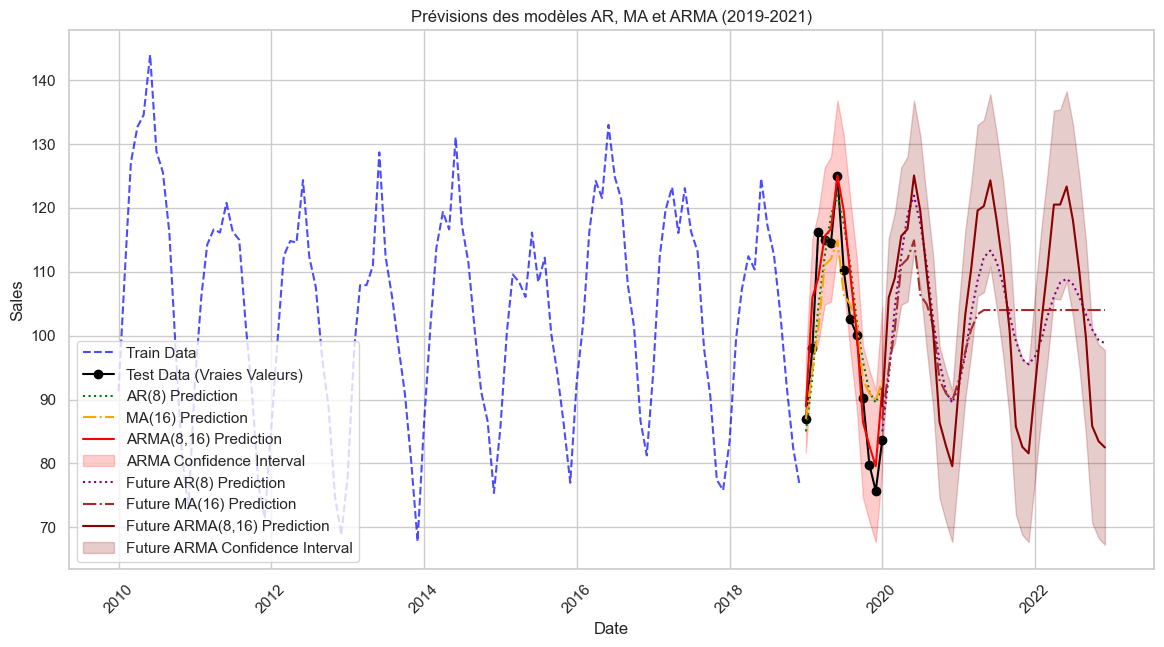

In [114]:
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

# 🔵 Données réelles
plt.plot(train_data.index, train_data.values, label='Train Data', color='blue', linestyle='dashed', alpha=0.7)
plt.plot(test_data.index, test_data.values, label='Test Data (Vraies Valeurs)', color='black', marker='o')

# 🔴 Prédictions (2019-2020)
plt.plot(forecast_df.index, forecast_df['AR(8)'], label='AR(8) Prediction', color='green', linestyle='dotted')
plt.plot(forecast_df.index, forecast_df['MA(16)'], label='MA(16) Prediction', color='orange', linestyle='dashdot')
plt.plot(forecast_df.index, forecast_df['ARMA(8,16)'], label='ARMA(8,16) Prediction', color='red')

# Intervalle de confiance ARMA (2019-2020)
plt.fill_between(forecast_df.index, forecast_df['ARMA_Lower_CI'], forecast_df['ARMA_Upper_CI'],
                 color='red', alpha=0.2, label="ARMA Confidence Interval")

# 🟣 Prédictions futures (2020-2021)
plt.plot(future_forecast_df.index, future_forecast_df['AR(8)'], label='Future AR(8) Prediction', color='purple', linestyle='dotted')
plt.plot(future_forecast_df.index, future_forecast_df['MA(16)'], label='Future MA(16) Prediction', color='brown', linestyle='dashdot')
plt.plot(future_forecast_df.index, future_forecast_df['ARMA(8,16)'], label='Future ARMA(8,16) Prediction', color='darkred')

# Intervalle de confiance ARMA (2020-2021)
plt.fill_between(future_forecast_df.index, future_forecast_df['ARMA_Lower_CI'], future_forecast_df['ARMA_Upper_CI'],
                 color='darkred', alpha=0.2, label="Future ARMA Confidence Interval")

plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Prévisions des modèles AR, MA et ARMA (2019-2021)")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# **Analyse et Prévision avec ARIMA sur des Données Non Stationnaires**

Nous allons :  
1. Explorer une série temporelle non stationnaire.  
2. Tester la stationnarité et appliquer la différenciation si nécessaire.  
3. Ajuster un modèle ARIMA et comparer les résultats.  



In [9]:
start_data=pd.to_datetime('1990-01-01')
end_data=pd.to_datetime('2010-01-01')
data2=data[start_data:end_data]
data2.tail()

,SALES
DATE,
2009-09-01,119.4439
2009-10-01,106.7741
2009-11-01,87.8541
2009-12-01,77.7939
2010-01-01,91.2895


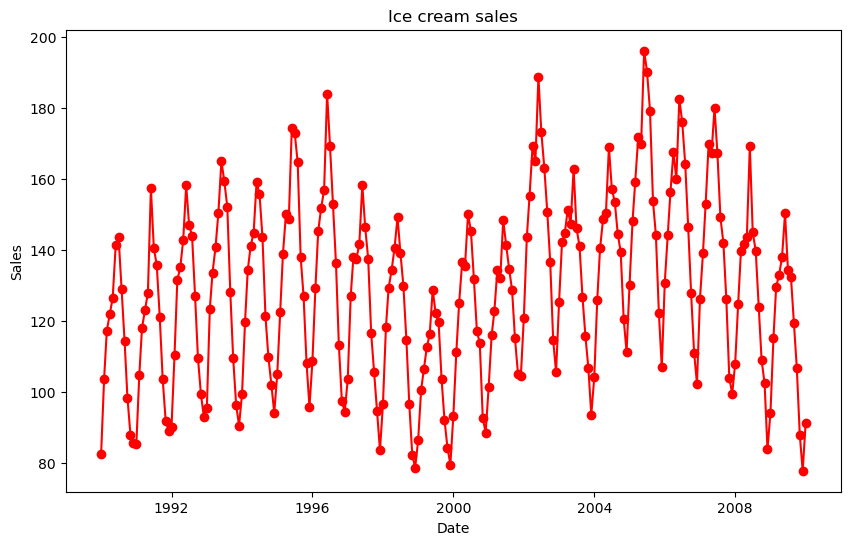

In [11]:
plt.figure(figsize=(10,6))
plt.plot(data2,marker='o',color='r',linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Ice cream sales')
plt.show()

### 📊 Testons la stationnarité de la série data2

In [122]:
print("📈 Test de stationnarité avec ADF sur data2:")
Stationnarite_test_adf(data2)


📈 Test de stationnarité avec ADF sur data2:
ADF Statistic : -2.749033
p-value :0.065931
Critical Values:
	1%: -3.460
	5%: -2.874
	10%: -2.574


🔹 Analyse :
- La statistique ADF (-2.749033) est supérieure au seuil critique à 5% (-2.874), ce qui signifie que nous ne pouvons pas rejeter l'hypothèse nulle H0.
- La p-value (0.065931) est supérieure à 0.05, ce qui confirme également que nous ne rejetons pas H0 .
- ⚠️ Conclusion :
La série n'est pas stationnaire

---

# 📌 **Différenciation et Stationnarisation des Séries Temporelles**

Le modèle **ARIMA (AutoRegressive Integrated Moving Average)** est conçu pour traiter les séries temporelles **non stationnaires**. Contrairement aux modèles **AR (AutoRegressive)** et **MA (Moving Average)**, ARIMA inclut une **étape de différenciation** permettant de transformer une série non stationnaire en une série stationnaire avant d'appliquer les modèles AR et MA.

---

## 🔹 **Formulation Mathématique d'ARIMA**
Le modèle ARIMA(\(p, d, q\)) inclut une opération de différenciation d’ordre \( d \), définie par :

$$
\Delta^d y_t = (1 - B)^d y_t
$$

où :
- \( B \) est l’**opérateur de retard**, défini par \( B y_t = y_{t-1} \),  
- \( d \) représente le **nombre de différenciations nécessaires** pour rendre la série stationnaire.

---


### 🔍 **Méthodes courantes pour stationnariser une série**
1. **Transformation logarithmique**  
   - Utile lorsque l'amplitude des fluctuations augmente avec le niveau de la série.  
   - Définition :  
     $$
     z_t = \log(y_t)
     $$

2. **Moyenne mobile (SMA - Simple Moving Average)**  
   - Permet de lisser la série en réduisant les fluctuations à court terme.
   - Définition pour une fenêtre de taille \( k \) :  
     $$
     SMA_t = \frac{1}{k} \sum_{i=0}^{k-1} y_{t-i}
     $$

3. **Différenciation (opération clé d'ARIMA)**  
   - Élimine les tendances à long terme pour rendre la série plus stationnaire.
   - **Première différenciation** :  
     $$
     \Delta y_t = y_t - y_{t-1}
     $$
     Ceci peut être réécrit sous forme d'opérateur de retard \( B \) :  
     $$
     \Delta y_t = (1 - B) y_t = y_t - B y_t = y_t - y_{t-1}
     $$
     Cette opération est utilisée lorsque la série suit une tendance linéaire.

   - **Deuxième différenciation** (si la tendance est plus complexe) :  
     $$
     \Delta^2 y_t = (y_t - y_{t-1}) - (y_{t-1} - y_{t-2})
     $$
     Ce qui revient à :  
     $$
     \Delta^2 y_t = y_t - 2y_{t-1} + y_{t-2}
     $$
     Cette opération est utilisée lorsque la série suit une tendance quadratique.

ℹ️ **Remarque :**  
Après différenciation, les prévisions sont faites sur la série transformée \( \Delta y_t \), puis reconstruites en ajoutant \( y_{t-1} \).

---

## 🔹 **Illustration de la Différenciation avec Python**

📉 Test ADF après différenciation :
ADF Statistic : -3.469339
p-value :0.008810
Critical Values:
	1%: -3.460
	5%: -2.874
	10%: -2.574


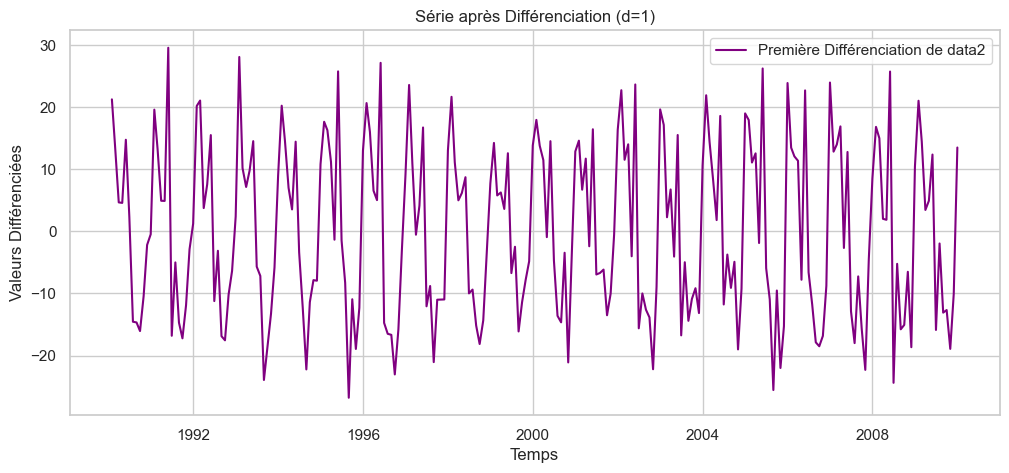

In [126]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Charger les données (assurez-vous que 'data2' est défini)
# data2 = pd.read_csv("chemin_vers_fichier.csv", index_col="date", parse_dates=True)

# 🟠 Appliquer la première différenciation sur la série non stationnaire
data2_diff = data2.diff().dropna()

# 📉 Tester la stationnarité après différenciation
print("📉 Test ADF après différenciation :")
Stationnarite_test_adf(data2_diff)

# 📈 Visualisation de la série après différenciation
plt.figure(figsize=(12, 5))
plt.plot(data2_diff, color='purple', label="Première Différenciation de data2")
plt.title("Série après Différenciation (d=1)")
plt.xlabel("Temps")
plt.ylabel("Valeurs Différenciées")
plt.legend()
plt.show()


### 🎉 Abracadabra ! La série est maintenant clairement stationnaire.

## 🔹  Tracé des Graphiques ACF et PACF 

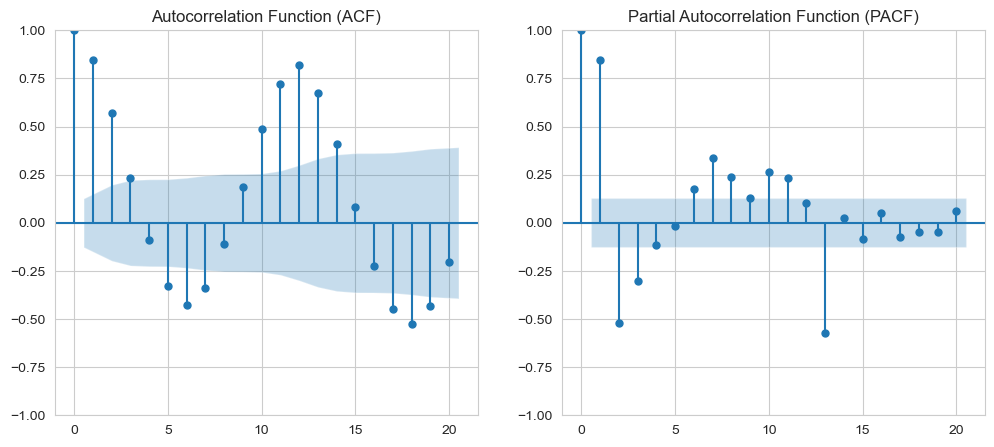

In [75]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Tracé des graphiques ACF et PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(data2, ax=axes[0], lags=20)
axes[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(data2, ax=axes[1], lags=20)
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.show()

#### On constate que le graphique ACF présente des périodes, mais l'amplitude n'est pas régulière. Cela montre la présence de **saisonnalité** et indique que la série est **non-stationnaire**.


# modelisation avec arima :


#### 📌 1. Séparation des données en jeu d'entraînement et de test

In [78]:
# Définition des périodes d'entraînement et de test
train_end = '2004-12-31'
test_start = '2005-01-01'
test_end = '2010-01-01'

# Séparation des données
train_data = data2.loc[:train_end]
test_data = data2.loc[test_start:test_end]

# Séparation des valeurs cibles (SALES)
y_train = train_data['SALES']
y_test = test_data['SALES']

# Création et ajustement du modèle ARIMA
arima_model = ARIMA(y_train, order=(5, 1,10))  
arima_results = arima_model.fit()

# Prévisions (avec gestion correcte des indices)
forecast_horizon = len(test_data)
arima_forecast = arima_results.forecast(steps=forecast_horizon, typ='levels')

# Création d'un DataFrame pour stocker les prévisions avec les dates correspondantes
forecast_index = test_data.index
forecast_df = pd.DataFrame({'Forecast': arima_forecast}, index=forecast_index)




C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Pas

In [80]:
print(arima_results.summary())


                               SARIMAX Results                                
Dep. Variable:                  SALES   No. Observations:                  180
Model:                ARIMA(5, 1, 10)   Log Likelihood                -580.752
Date:                Sat, 22 Feb 2025   AIC                           1193.504
Time:                        18:44:26   BIC                           1244.502
Sample:                    01-01-1990   HQIC                          1214.184
                         - 12-01-2004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7514      0.037     20.359      0.000       0.679       0.824
ar.L2         -0.2436      0.042     -5.870      0.000      -0.325      -0.162
ar.L3         -0.3059      0.038     -7.946      0.0

## 📊 Analyse des Résultats du Modèle 

Nous avons ajusté un **ARIMA(5,1,10)** sur notre série temporelle et obtenu les résultats suivants :

---

## 🔍 Résumé du Modèle  
- **Modèle sélectionné** : `ARIMA(5,1,10)`  
- **Nombre d'observations** : 180  
- **Log-Likelihood** : -580.752  
- **AIC (Akaike Information Criterion)** : 1193.505  
  → Plus l'AIC est bas, meilleur est le modèle.  
- **BIC (Bayesian Information Criterion)** : 1244.503  
  → Le BIC pénalise plus les modèles complexes.  
- **HQIC (Hannan-Quinn Information Criterion)** : 1214.184  
  → Un critère alternatif qui peut être utile dans le choix du modèle.

---

## 📈 Interprétation des Coefficients  

### 📌 **Partie AR (Auto-Regressive)**  
Les coefficients **ar.L1 à ar.L5** représentent les **termes auto-régressifs** :  
- Tous les termes AR sont significatifs (**p-valeur < 0.05**), ce qui indique une forte relation de dépendance entre les observations passées et la valeur actuelle.  
- Les coefficients **ar.L1 (0.7514)**, **ar.L4 (0.7132)** et **ar.L5 (-0.9539)** sont particulièrement importants, avec des valeurs proches de 1 et -1, montrant une forte autocorrélation.

### 📌 **Partie MA (Moving Average)**  
Les coefficients **ma.L1 à ma.L10** capturent la **moyenne mobile** :  
- Certains termes ont un impact notable, comme `ma.L1 (-1.0103)` et `ma.L5 (1.4243)`, avec des p-valeurs significatives (**p < 0.05**).  
- D'autres termes comme `ma.L2 (0.2505)` et `ma.L6 (-0.2646)` sont moins significatifs (**p > 0.05**), suggérant un impact plus faible dans la modélisation des erreurs.

### 📌 **Sigma²**  
- **Valeur estimée** : `0.6921`  
  → Indique la variance de l'erreur résiduelle.  
  → Plus **sigma² est faible**, plus le modèle est précis.

---

## 📊 Tests Statistiques  

### ✅ **Ljung-Box Test** (Autocorrélation des résidus)  
- **Q-Stat** : `0.17`  
- **Probabilité (p-value)** : `0.92`  
  → **Si p > 0.05**, il **n'y a pas d'autocorrélation significative** dans les résidus.  
  → Ici, **nos résidus semblent indépendants**, ce qui suggère que le modèle est bien ajusté.

### ✅ **Jarque-Bera Test** (Normalité des résidus)  
- **Statistique** : `1.27`  
- **p-value** : `0.53`  
  → **Si p > 0.05**, on ne rejette pas l'hypothèse de normalité.  
  → Nos résidus semblent suivre une distribution normale, ce qui est un bon signe pour la qualité de l'ajustement.

### ✅ **Heteroskedasticity (H Test)**  
- **H = 1.03**, **p = 0.31**  
  → Aucune **hétéroscédasticité significative** détectée. Les erreurs semblent constantes.

---

## ❌ Problèmes Identifiés  

1. **Surajustement possible**  
   - Bien que la majorité des coefficients AR et MA soient significatifs, quelques termes MA (comme `ma.L2` et `ma.L6`) ne sont pas très influents, ce qui suggère qu'un modèle plus simple pourrait être tout aussi efficace.

2. **Amélioration de la saisonnalité**  
   - La série étant **saisonnière**, un modèle **SARIMA** pourrait être plus adapté qu'un simple **ARIMA** pour mieux capturer les effets saisonniers et améliorer les prévisions.

---

## 🔄 Comparaison avec les résultats précédents

- **ARIMA(5,1,10)** montre des résultats similaires en termes de performance (AIC, BIC), mais la prise en compte explicite de la saisonnalité dans un modèle **SARIMA** pourrait améliorer les prédictions sur les séries ayant des effets cycliques.


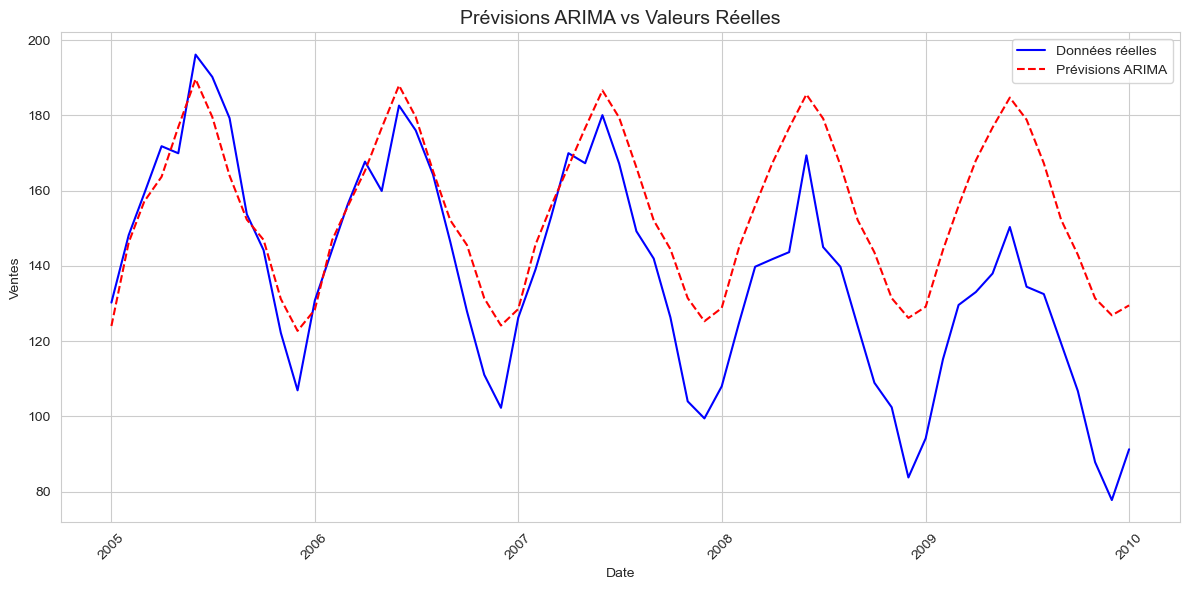

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration du style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Tracer les données réelles
plt.plot(y_test.index, y_test, label='Données réelles', color='blue')

# Tracer les prévisions
plt.plot(forecast_df.index, forecast_df['Forecast'], 
         label='Prévisions ARIMA', color='red', linestyle='--')

# Personnalisation du graphique
plt.title('Prévisions ARIMA vs Valeurs Réelles', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.legend()

# Rotation des dates pour une meilleure lisibilité
plt.xticks(rotation=45)

# Ajuster automatiquement les marges
plt.tight_layout()

# Afficher le graphique
plt.show()

### 📊 **Visualisation des Résultats**  
• **Visualisation des prévisions** : Affichez les prévisions, les valeurs réelles et l'historique pour observer les différences.

• **Évaluation des performances** :  
   - Utilisez des métriques comme :
     - **MAE** (Mean Absolute Error)
     - **RMSE** (Root Mean Squared Error)
     - **MAPE** (Mean Absolute Percentage Error)  
   pour mesurer la qualité des prévisions.


MAE : 18.59
RMSE : 23.12
MAPE : 15.72%


C:\Users\khali\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


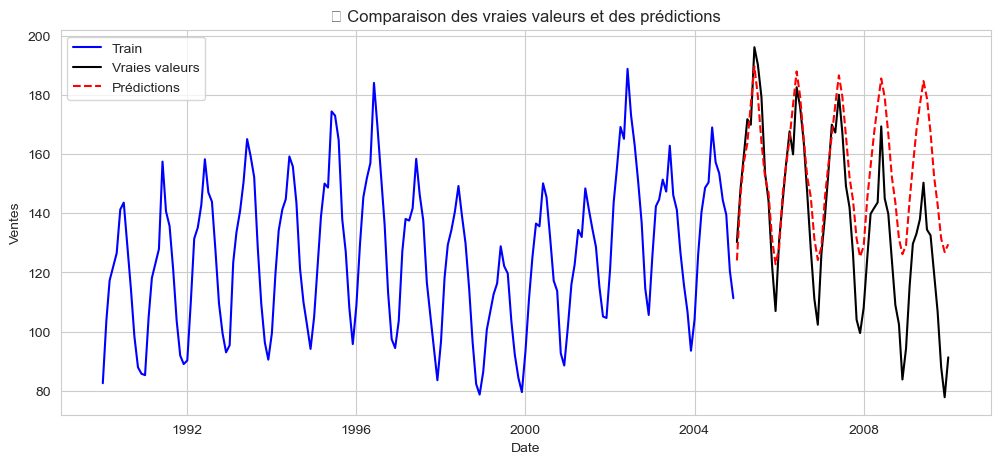

C:\Users\khali\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


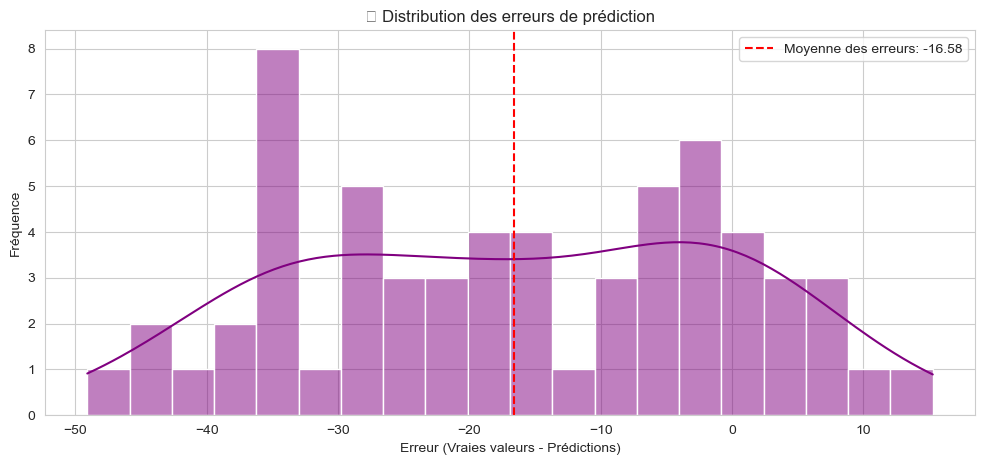

C:\Users\khali\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


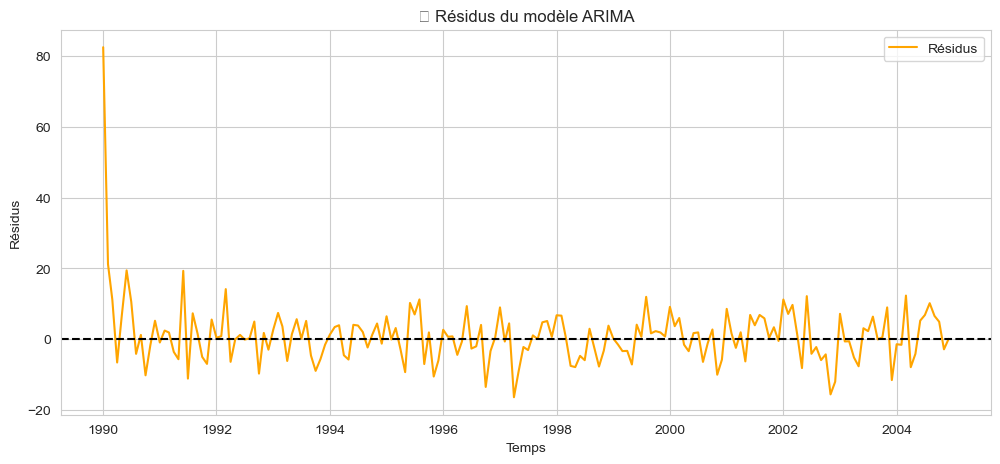

C:\Users\khali\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


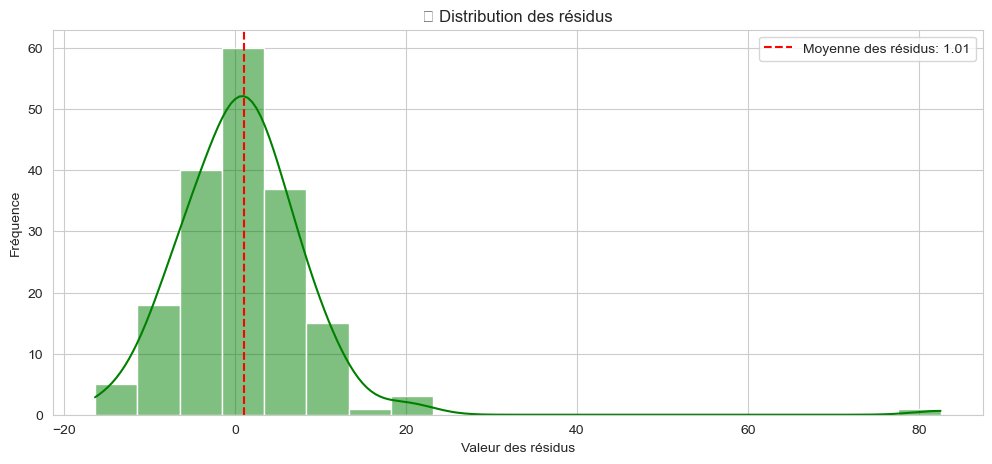

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
# Calcul des erreurs
mae = mean_absolute_error(test_data['SALES'], arima_forecast)
rmse = np.sqrt(mean_squared_error(test_data['SALES'], arima_forecast))
mape = np.mean(np.abs((test_data['SALES'] - arima_forecast) / test_data['SALES'])) * 100

# Affichage des métriques
print(f"MAE : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")

test_data = test_data.copy()  # Pour éviter l'avertissement SettingWithCopyWarning
test_data['Prediction'] = arima_forecast
# 📊  Graphique des vraies valeurs vs. prédictions
plt.figure(figsize=(12, 5))
plt.plot(train_data.index, train_data['SALES'], label='Train', color='blue')
plt.plot(test_data.index, test_data['SALES'], label='Vraies valeurs', color='black')
plt.plot(test_data.index, test_data['Prediction'], label='Prédictions', color='red', linestyle='dashed')
plt.legend()
plt.title("📈 Comparaison des vraies valeurs et des prédictions")
plt.xlabel("Date")
plt.ylabel("Ventes")
plt.show()

# 📊  Distribution des erreurs (Vraies valeurs - Prédictions)
errors = test_data['SALES'] - test_data['Prediction']
plt.figure(figsize=(12, 5))
sns.histplot(errors, bins=20, kde=True, color='purple')
plt.axvline(errors.mean(), color='red', linestyle='dashed', label=f"Moyenne des erreurs: {errors.mean():.2f}")
plt.legend()
plt.title("📊 Distribution des erreurs de prédiction")
plt.xlabel("Erreur (Vraies valeurs - Prédictions)")
plt.ylabel("Fréquence")
plt.show()

# 📊 Analyse des résidus (différence entre les vraies valeurs et le modèle)
residuals = arima_results.resid
plt.figure(figsize=(12, 5))
plt.plot(residuals, label='Résidus', color='orange')
plt.axhline(0, color='black', linestyle='dashed')
plt.legend()
plt.title("📉 Résidus du modèle ARIMA")
plt.xlabel("Temps")
plt.ylabel("Résidus")
plt.show()

# 📊  Graphique des résidus en fonction du temps
plt.figure(figsize=(12, 5))
sns.histplot(residuals, bins=20, kde=True, color='green')
plt.axvline(residuals.mean(), color='red', linestyle='dashed', label=f"Moyenne des résidus: {residuals.mean():.2f}")
plt.legend()
plt.title("📉 Distribution des résidus")
plt.xlabel("Valeur des résidus")
plt.ylabel("Fréquence")
plt.show()


### • Sélection des paramètres :

- Utilisez des critères d’information (AIC, BIC) pour déterminer les ordres p, d et q.

L'utilisation de cette méthode est un peu lourde dans notre cas, donc je vais vous montrer just la démarche.

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Génération de données fictives
np.random.seed(42)
n = 100
time_series = np.cumsum(np.random.randn(n)) + 50  # Séries temporelles aléatoires

dates = pd.date_range(start='2020-01-01', periods=n, freq='D')
data = pd.DataFrame({'DATE': dates, 'SALES': time_series})
data.set_index('DATE', inplace=True)

# Division des données en ensemble d'entraînement et de test
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Définition des plages de valeurs pour p et q
p_values = range(0, 3)
q_values = range(0, 3)
d_values = range(0, 3)  # On peut utiliser n'importe quelle intervalle de recherche

best_aic = float("inf")
best_bic = float("inf")
best_order_aic = None
best_order_bic = None

results = []

# Recherche des meilleurs paramètres (p, d, q)
for p in p_values:
    for q in q_values:
        for d in d_values:
            try:
                model = ARIMA(train_data['SALES'], order=(p, d, q))
                results_arima = model.fit()
                
                results.append({
                    'order': (p, d, q),
                    'aic': results_arima.aic,
                    'bic': results_arima.bic
                })
                
                if results_arima.aic < best_aic:
                    best_aic = results_arima.aic
                    best_order_aic = (p, d, q)
                
                if results_arima.bic < best_bic:
                    best_bic = results_arima.bic
                    best_order_bic = (p, d, q)
                    
            except:
                continue

print("\nMeilleur ordre selon AIC:", best_order_aic)
print("AIC:", best_aic)
print("\nMeilleur ordre selon BIC:", best_order_bic)
print("BIC:", best_bic)

```
---

### • Sélection automatique des paramètres ARIMA avec `pmdarima`

La fonction `auto_arima` de la bibliothèque `pmdarima` permet d'automatiser le processus de sélection des paramètres du modèle ARIMA (\( p, d, q \)). Au lieu de tester manuellement différentes combinaisons, `auto_arima` explore plusieurs configurations et choisit la meilleure en fonction de critères d'information tels que **AIC** (Akaike Information Criterion) ou **BIC** (Bayesian Information Criterion).

#### • Explication du code :


pip install pmdarima

In [88]:
import pmdarima as pm

best_model = pm.auto_arima(data2, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1899.242, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3038.543, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2741.979, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1899.123, Time=0.20 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1916.213, Time=0.11 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1899.841, Time=0.20 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=0.37 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1902.696, Time=0.12 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.60 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1865.569, Time=0.40 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1935.284, Time=0.34 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1891.853, Time=0.27 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1823.102, T

### Paramètres de la fonction `auto_arima`

| Paramètre            | Description |
|----------------------|------------|
| `data2`             | Les données d'entrée (une série temporelle). |
| `seasonal=False`    | Indique que l'on cherche un ARIMA (pas SARIMA), donc sans composante saisonnière. |
| `trace=True`        | Affiche les tests de différents modèles pendant l'entraînement. |
| `error_action='ignore'` | Ignore les erreurs lors du test des combinaisons de paramètres. |
| `suppress_warnings=True` | Supprime les avertissements inutiles pendant l'exécution. |


---

### Analyse des résultats de `auto_arima()`

L'auto-sélection des paramètres avec `auto_arima()` a donné comme **meilleur modèle** :  
**ARIMA(4,0,3)**

Cependant, ce modèle reste un mauvais choix, car notre série **présente une saisonnalité**, et un ARIMA simple peut ne pas être efficace.

### 🏆 Choix du Meilleur Modèle

Dans notre cas, après analyse du **PACF** :
- **p = 8** et **q = 16** semblent être les meilleurs choix.
- **d = 1** est suffisant pour rendre notre série stationnaire.

Ainsi, **ARIMA(5,1,10) reste le modèle optimal pour le moment**.

---

### 🔍 Prochaine Étape
- **Illustration de SARIMA** : Nous allons ensuite voir comment un modèle **SARIMA** peut améliorer les résultats sur une série saisonnière.
- **Application d'ARIMA sur une série ni saisonnière ni stationnaire** : Enfin, nous testerons l'ARIMA sur un cas plus complexe.




## La principale différence entre **ARIMA** et **SARIMA** réside dans la prise en compte de la **saisonnalité**.

- **ARIMA (AutoRegressive Integrated Moving Average)** est un modèle statistique utilisé pour analyser et prédire des séries temporelles non saisonnières. Il repose sur trois composants :  
  - **AR (AutoRegressive)** : dépendance des observations passées.  
  - **I (Integrated)** : différenciation pour rendre la série stationnaire.  
  - **MA (Moving Average)** : dépendance des erreurs passées.  

- **SARIMA (Seasonal ARIMA)** est une extension d'ARIMA qui inclut un **composant saisonnier** pour capturer les variations périodiques. Il ajoute quatre nouveaux paramètres :  
  - **P (AutoRegressive saisonnier)**  
  - **D (Différenciation saisonnière)**  
  - **Q (Moving Average saisonnier)**  
  - **m (période de la saisonnalité, par ex. 12 pour des données mensuelles)**  

### Quand utiliser ARIMA ou SARIMA ?
- **Si votre série temporelle ne présente pas de saisonnalité marquée** → **ARIMA**  
- **Si votre série temporelle présente des motifs saisonniers clairs** → **SARIMA**  

Exemple d'application :  
- **ARIMA** : prévisions de ventes journalières sans tendance saisonnière claire.  
- **SARIMA** : prévisions de consommation d’électricité avec des pics mensuels ou annuels.  


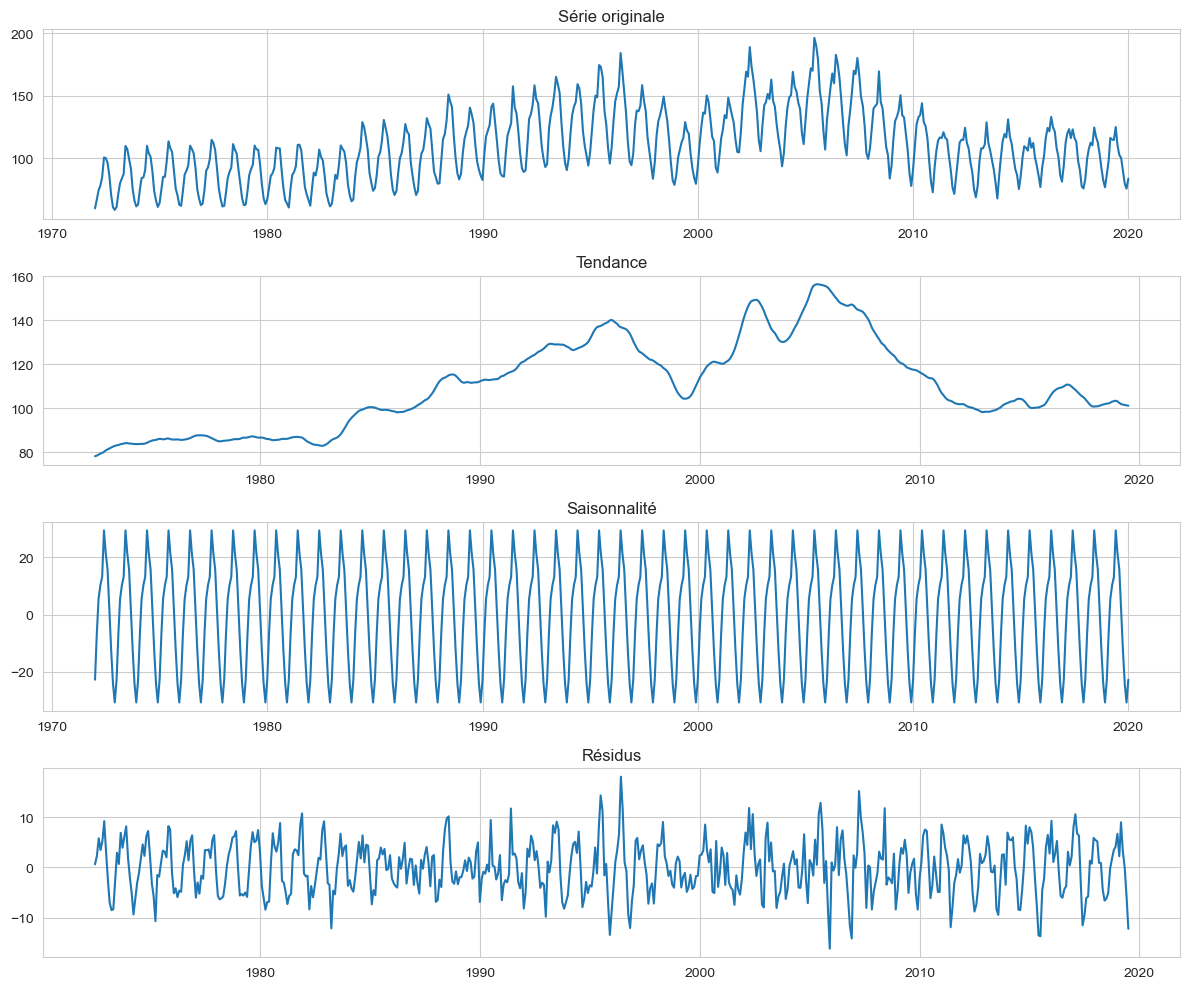

In [112]:
decomposition = sm.tsa.seasonal_decompose(data, model='additive', period=12)

plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(decomposition.observed)
plt.title('Série originale')
plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Tendance')
plt.subplot(413)
plt.plot(decomposition.seasonal)   
plt.title('Saisonnalité')
plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Résidus')
plt.tight_layout()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1160.493, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1116.508, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1098.445, Time=0.25 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1160.208, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1100.445, Time=0.41 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1100.445, Time=0.67 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1116.080, Time=0.16 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1101.909, Time=1.15 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1100.328, Time=0.15 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1100.445, Time=0.44 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1100.444, Time=0.33 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1098.814, Time=0.21 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1097.367, Time=0.53 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1154.163, Time=0.30 sec
 ARIMA(1,1,2)(1,1,1

C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



Performances des modèles:
RMSE SARIMA: 20.39


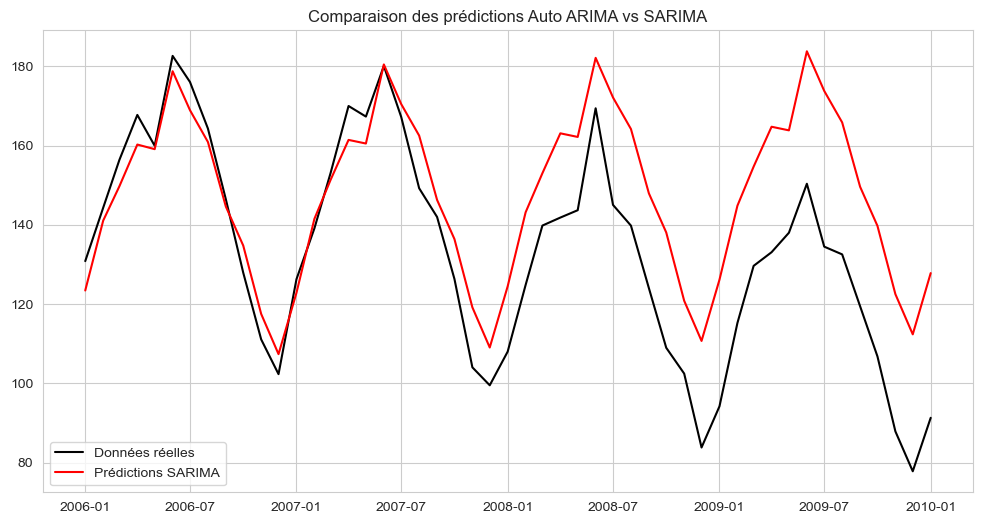


Résumé du modèle SARIMA:
                                      SARIMAX Results                                       
Dep. Variable:                                SALES   No. Observations:                  192
Model:             SARIMAX(3, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -539.953
Date:                              Sat, 22 Feb 2025   AIC                           1089.906
Time:                                      19:05:32   BIC                           1105.843
Sample:                                  01-01-1990   HQIC                          1096.368
                                       - 12-01-2005                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1301      0.068     -1.902      0.057      -0.264      

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import pmdarima as pm



# Préparation des données
n = len(data2)
train_size = int(n * 0.8)
train_data = data2[:train_size]
test_data = data2[train_size:]

# Auto ARIMA pour trouver les meilleurs paramètres
auto_arima = pm.auto_arima(train_data,
                          seasonal=True,
                          m=12,  # période mensuelle
                          d=1,   # différenciation non-saisonnière
                          D=1,   # différenciation saisonnière
                          start_p=0, start_q=0,
                          max_p=10, max_q=10,
                          start_P=0, start_Q=0,
                          max_P=2, max_Q=2,
                          trace=True,
                          error_action='ignore',
                          suppress_warnings=True)

# Récupérer les ordres du modèle auto_arima
order = auto_arima.order  # (p,d,q)
seasonal_order = auto_arima.seasonal_order  # (P,D,Q,s)

print(f"\nMeilleurs paramètres trouvés par auto_arima:")
print(f"Order (p,d,q): {order}")
print(f"Seasonal Order (P,D,Q,s): {seasonal_order}")

# Application du modèle SARIMA avec les paramètres d'auto_arima
sarima_model = sm.tsa.SARIMAX(train_data,
                             order=order,
                             seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit(disp=False)

# Prédictions

sarima_pred = sarima_fit.forecast(len(test_data))
arima_pred=arima_results.forecast(len(test_data))


sarima_rmse = np.sqrt(mean_squared_error(test_data, sarima_pred))

sarima_mse = mean_squared_error(test_data, sarima_pred)

sarima_mae = mean_absolute_error(test_data,  sarima_pred)

print("\nPerformances des modèles:")

print(f"RMSE SARIMA: {sarima_rmse:.2f}")

# Visualisation des résultats
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Données réelles', color='black')

plt.plot(test_data.index, sarima_pred, label='Prédictions SARIMA', color='red')
plt.title('Comparaison des prédictions Auto ARIMA vs SARIMA')
plt.legend()
plt.grid(True)
plt.show()

# Affichage du résumé du modèle SARIMA
print("\nRésumé du modèle SARIMA:")
print(sarima_fit.summary())

## Résultats détaillés de la comparaison ARIMA(5,1,10) / SARIMA(3,1,0)(0,1,1,12) :

C:\Users\khali\AppData\Local\Temp\ipykernel_18328\211373626.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modèle', y='RMSE', data=metrics_df, ax=ax1, palette=['blue', 'red'], alpha=0.7)
C:\Users\khali\AppData\Local\Temp\ipykernel_18328\211373626.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modèle', y='MAE', data=metrics_df, ax=ax2, palette=['blue', 'red'], alpha=0.7)



Résultats détaillés de la comparaison:
                 Modèle      RMSE       MAE
          ARIMA(5,1,10) 23.118655 18.586281
SARIMA(3,1,0)(0,1,1,12) 20.385460 16.495530


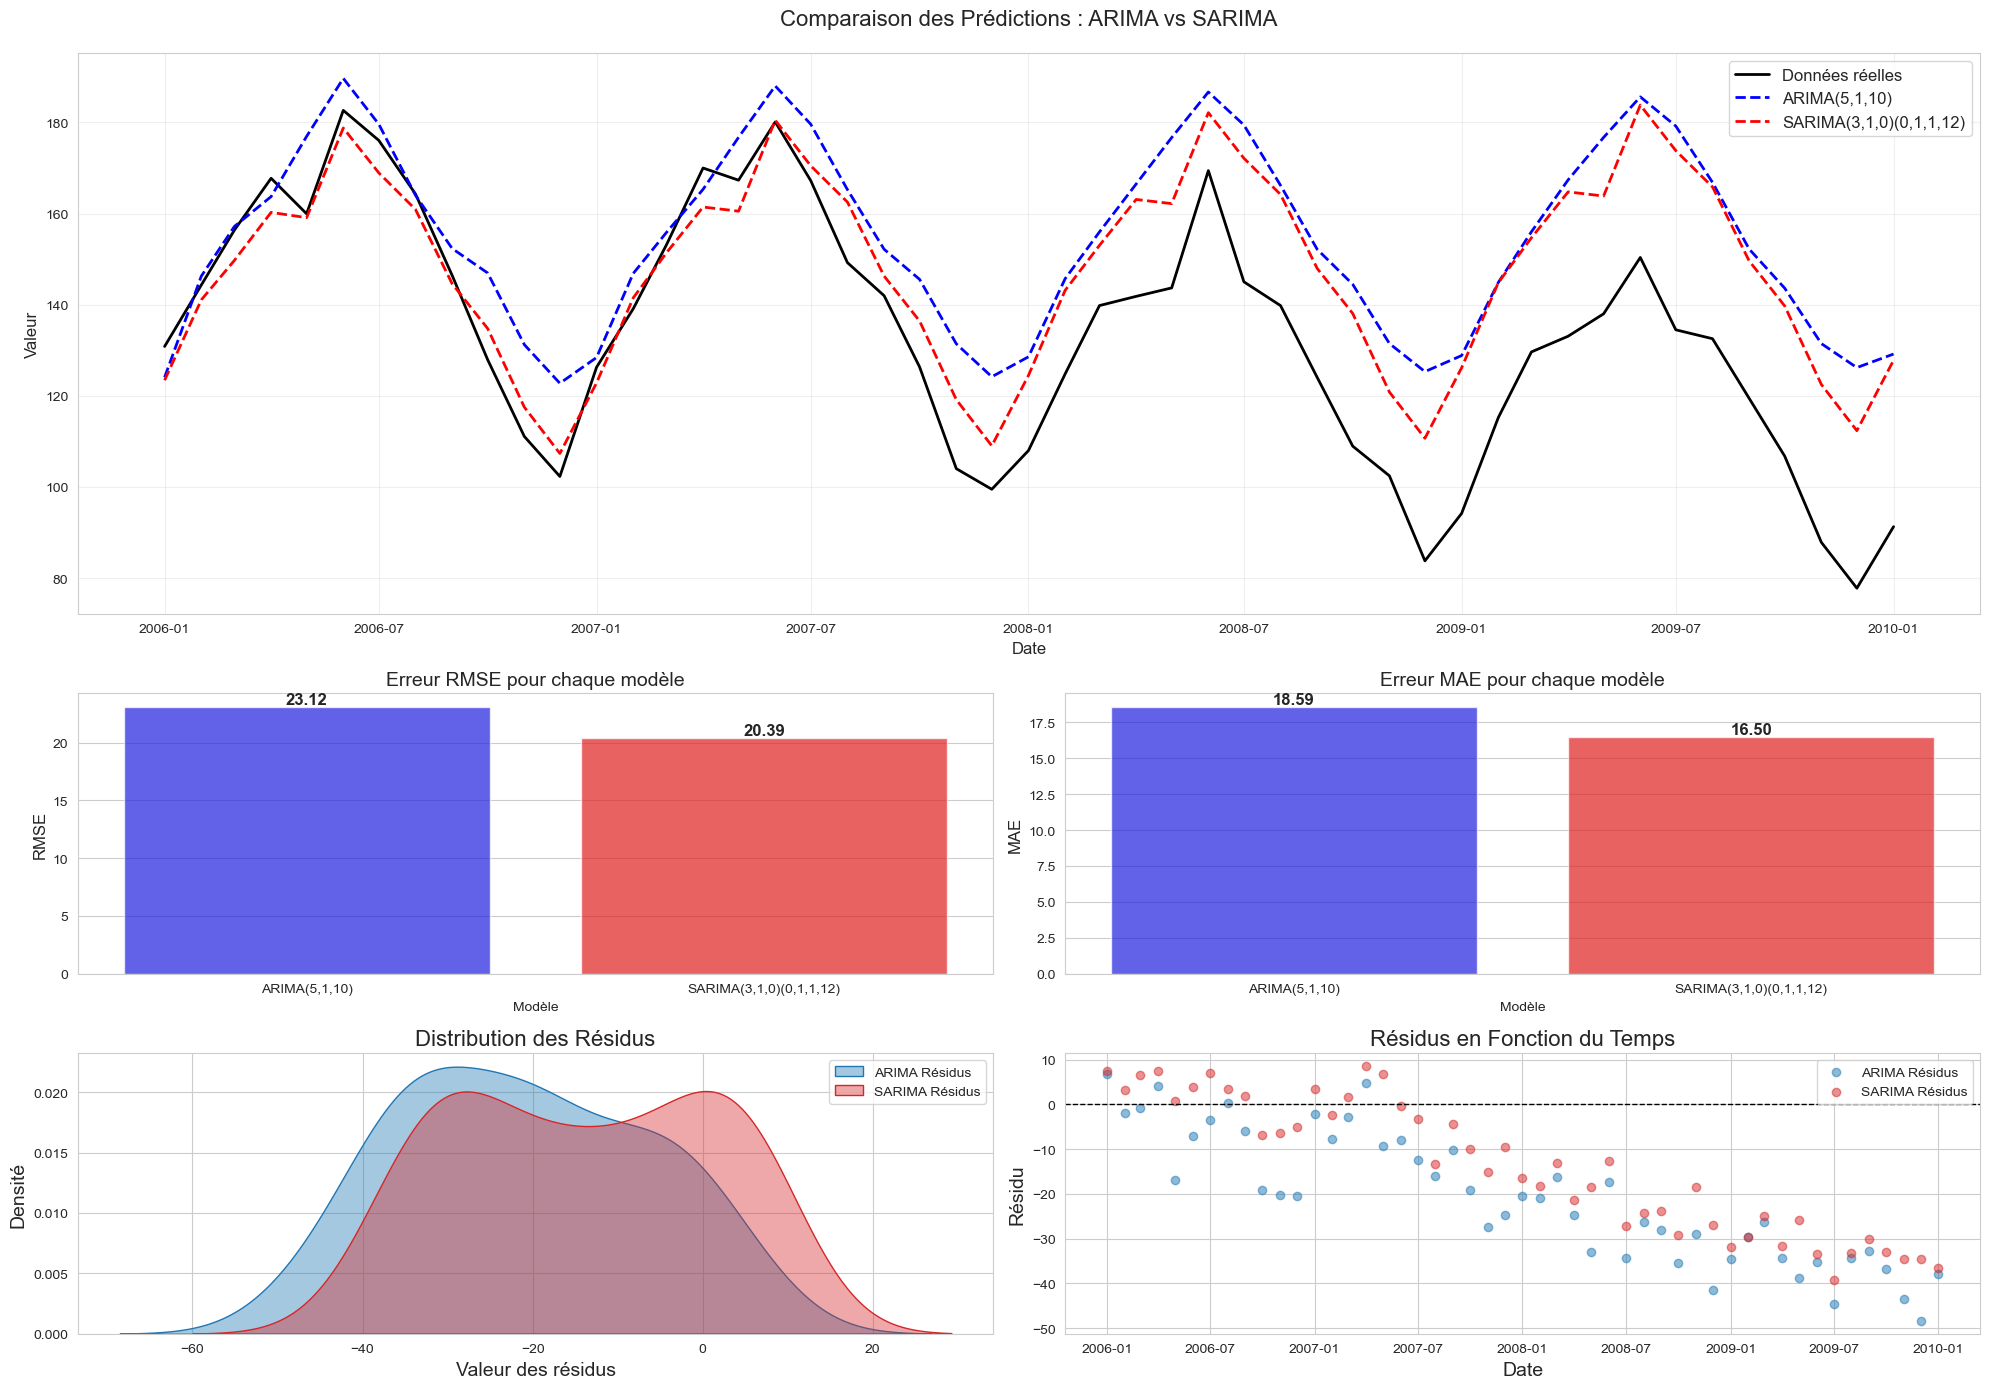

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.gridspec as gridspec


def plot_detailed_comparison(test_data, arima_pred, sarima_pred, arima_rmse, sarima_rmse, arima_mae, sarima_mae):
    # Configuration du style
    sns.set_style("whitegrid")
    
    # Création de la figure avec une mise en page optimisée
    fig = plt.figure(figsize=(20, 14))
    gs = gridspec.GridSpec(3, 2, height_ratios=[2, 1, 1])
    
    # 1. Comparaison des prédictions
    ax0 = plt.subplot(gs[0, :])
    ax0.plot(test_data.index, test_data, label='Données réelles', color='black', linewidth=2)
    ax0.plot(test_data.index, arima_pred, label='ARIMA(5,1,10)', color='blue', linestyle="--", linewidth=2)
    ax0.plot(test_data.index, sarima_pred, label='SARIMA(3,1,0)(0,1,1,12)', color='red', linestyle="--", linewidth=2)
    ax0.set_title('Comparaison des Prédictions : ARIMA vs SARIMA', fontsize=16, pad=20)
    ax0.legend(loc='upper right', fontsize=12)
    ax0.grid(True, alpha=0.3)
    ax0.set_xlabel('Date', fontsize=12)
    ax0.set_ylabel('Valeur', fontsize=12)
    
    # 2. Comparaison des métriques d'erreur
    ax1 = plt.subplot(gs[1, 0])
    metrics_df = pd.DataFrame({
        'Modèle': ['ARIMA(5,1,10)', 'SARIMA(3,1,0)(0,1,1,12)'],
        'RMSE': [arima_rmse, sarima_rmse],
        'MAE': [arima_mae, sarima_mae]
    })
    
    sns.barplot(x='Modèle', y='RMSE', data=metrics_df, ax=ax1, palette=['blue', 'red'], alpha=0.7)
    ax1.set_title('Erreur RMSE pour chaque modèle', fontsize=14)
    ax1.set_ylabel('RMSE', fontsize=12)
    
    # Ajout des valeurs sur les barres
    for p in ax1.patches:
        ax1.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', fontsize=12, fontweight='bold')

    ax2 = plt.subplot(gs[1, 1])
    sns.barplot(x='Modèle', y='MAE', data=metrics_df, ax=ax2, palette=['blue', 'red'], alpha=0.7)
    ax2.set_title('Erreur MAE pour chaque modèle', fontsize=14)
    ax2.set_ylabel('MAE', fontsize=12)
    
    for p in ax2.patches:
        ax2.annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', fontsize=12, fontweight='bold')

    # 3. Distribution des résidus
    arima_pred = np.array(arima_pred).flatten()
    sarima_pred = np.array(sarima_pred).flatten()
    test_data_values = np.array(test_data).flatten()

    # Aligning indices of predictions and test data for correct subtraction
    arima_resid = test_data_values - pd.Series(arima_pred, index=test_data.index)
    sarima_resid = test_data_values - pd.Series(sarima_pred, index=test_data.index)

    ax3 = plt.subplot(gs[2, 0])
    sns.kdeplot(arima_resid, label='ARIMA Résidus', color='#1f77b4', fill=True, alpha=0.4, ax=ax3)
    sns.kdeplot(sarima_resid, label='SARIMA Résidus', color='#d62728', fill=True, alpha=0.4, ax=ax3)
    ax3.set_title('Distribution des Résidus', fontsize=16)
    ax3.set_xlabel('Valeur des résidus', fontsize=14)
    ax3.set_ylabel('Densité', fontsize=14)
    ax3.legend()

    # 4. Visualisation des résidus sous forme de scatter plot
    ax4 = plt.subplot(gs[2, 1])
    
    # Ensure both x and y have the same length before plotting
    if len(test_data.index) == len(arima_resid):
        ax4.scatter(test_data.index, arima_resid, label='ARIMA Résidus', color='#1f77b4', alpha=0.5)
    if len(test_data.index) == len(sarima_resid):
        ax4.scatter(test_data.index, sarima_resid, label='SARIMA Résidus', color='#d62728', alpha=0.5)
    
    ax4.axhline(0, linestyle="--", color='black', linewidth=1)
    ax4.set_title('Résidus en Fonction du Temps', fontsize=16)
    ax4.set_xlabel('Date', fontsize=14)
    ax4.set_ylabel('Résidu', fontsize=14)
    ax4.legend()

    # Ajustement de la mise en page
    plt.tight_layout()
    
    # Affichage d'un tableau récapitulatif
    print("\nRésultats détaillés de la comparaison:")
    print("=====================================")
    print(metrics_df.to_string(index=False))

    plt.show()

# Utilisation de la fonction
plot_detailed_comparison(test_data,arima_pred, sarima_pred, rmse, sarima_rmse, mae, sarima_mae)


# Interprétation des Résultats

Dans cette analyse, nous avons comparé les performances de deux modèles de prévision temporelle : **ARIM5,1,1016)** et **SARIMA(3,1,0)(0,1,1,12)**. En observant les résultats, on remarque qut, l'utilisation du modèle **SARIMA** semble être le meilleur choix pour ce cas particulier. Voici les points principaux de cette conclusion :

### 1. **Comparaison des Modèles**
   - **A5,1,10,1,16)** a été ajusté manuellement après une série d'analyses pour déterminer les paramètres optimaux. Ce processus peut être lourd et consommer beaucoup de temps, car il nécessite de tester plusieurs combinaisons de paramètres afin de maximiser la performance du modèle.
   - **SARIMA(3,1,0)(0,1,1,12)**, en revanche, a été trouvé en utilisant un processus **auto_arima**, qui cherche automatiquement le meilleur modèle en fonction des critères de performance. Bien que ce processus soit automatisé, il parvient à offrir des résultats compétitifs, voire meilleurs dans ce cas prmparable.

### 3. **Avantages de SARIMA**
   - Le principal avantage du modèle **SARIMA** est sa capacité à s'adapter automatiquement aux données, ce qui simplifie considérablement le processus de modélisation. L'algorithme **auto_arima** permet d'éviter les ajustements manuels et d'optimiser la recherche des meilleurs paramètres.
   - SARIMA gère mieux les composantes saisonnières et les cycles dans les séries temporelles. Il est donc plus flexible et souvent plus performant, surtout dans des contextes où les séries temporelles présentent des comportements saisonniers réguliers.

### 4. **Limites d'ARIMA**
   - L'**ARIMA** nécessite un réglage manuel des paramètres (p, d, q), ce qui peut devenir complexe et fastidieux, surtout lorsque l'on travaille avec des séries temporelles comportant des tendances ou des saisons subtiles.
   - Parfois, même après une optimisation manuelle minutieuse, le modèle ARIMA ne parvient pas toujours à atteindre les meilleures performances possibles, en particulier dans des situations complexes ou des séries plus bruitées.

### o- Lmances similaires, l'utilisation de **SARIMA** reste le choix optimal dans ce cas spécifique, car il permet de gagner du temps tout en obtenant des résultats compétitifs, voire meilleurs, avec un processus entièrement automatisé. L'approche **auto_arima** élimine la complexité et la lourdeur des ajustements manuels tout en maintenant une précision élevée.

   En résumé, **SARIMA** se distingue par sa simplicité et son efficacité, ce qui en fait un excellent choix pour des applications pratiques où l'objectif est d'optimiser le temps de modélisation tout en maintenant une performance robuste.
0

---

# 2.

La formule pour la première partie est donnée par :

$$
y_t = 10 + 0.2 \cdot t + 3 \cdot \sin\left(\frac{2\pi t}{12}\right) + \epsilon(t)
$$



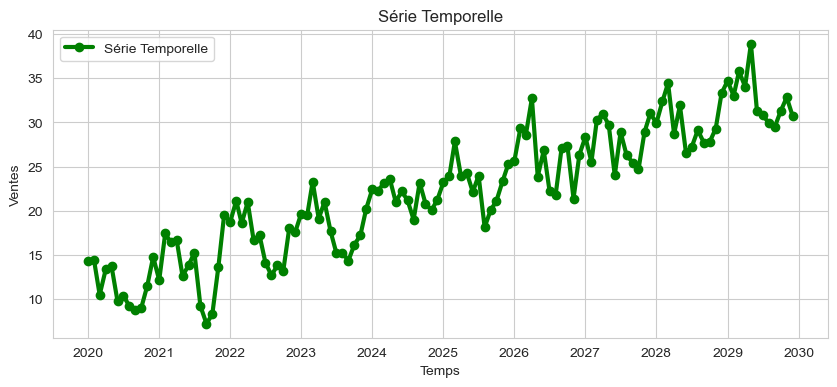

In [145]:
n = 120
# Création de la variable temps (t)

t = np.arange(1,n+1)
# Création de la tendance : β0 + β1⋅t

beta_0 = 10 # Ordonnée à l'origine
beta_1 = 0.2  # Pente
Tendence = beta_0 + beta_1 * t

# Création de la saisonnalité : A * sin(2pit / p + phi)
A = 3  # Amplitude
p = 12  # Période (2pi/p)
phi = 0  # Déphasage
Saisonalité = A * np.sin(2 * np.pi * t / p + phi)

# Création du bruit suivant une loi normale : ε(t) ~ N(0, σ²)
np.random.seed(10)
sigma = 2  # Écart-type du bruit
Bruit = np.random.normal(0, sigma, size=len(t))

# Stockage de la Série temporelle finale dans une dataframe
data3 = Tendence + Saisonalité + Bruit
dates = pd.date_range(start = '2020-01-01' , periods = n , freq = 'MS') 
data3 = pd.Series(data3 , index=dates)

# Trace des résultats
plt.figure(figsize=(10, 4))
plt.plot(ts_dates_sais ,  label="Série Temporelle", color="g" , marker = 'o' , linewidth = 3)

plt.legend()
plt.xlabel("Temps")
plt.ylabel("Ventes")
plt.grid(True)
plt.title("Série Temporelle")
plt.show()



In [143]:
# data.describe()
from statsmodels.stats.descriptivestats import describe
describe(data3)

,0
nobs,120.000000
missing,0.000000
mean,22.180129
std_err,0.659301
upper_ci,23.472335
lower_ci,20.887923
std,7.222279
iqr,11.245038
iqr_normal,8.335959
mad,5.986547


## En calculant le nombre de bins, j'ai trouvé  k = 6.944 , donc  k = 7 après arrondi.


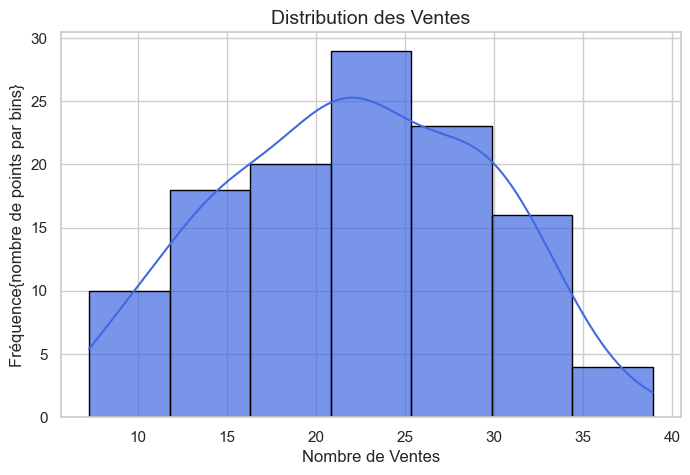

In [147]:
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(data3, kde=True, bins=7, color="royalblue", alpha=0.7, edgecolor="black")
plt.title("Distribution des Ventes", fontsize=14)
plt.xlabel("Nombre de Ventes", fontsize=12)
plt.ylabel("Fréquence{nombre de points par bins}", fontsize=12)
plt.show()

#  Analyse de stationnarité  (Tests ADF, KPSS)

In [156]:
Stationnarite_test_adf(data3)

ADF Statistic : -0.284723
p-value :0.927640
Critical Values:
	1%: -3.494
	5%: -2.889
	10%: -2.582


In [160]:
Stationnarite_test_kpss(data3)

KPSS Statistic : 1.709317
p-value :0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\khali\AppData\Local\Temp\ipykernel_18328\493224427.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result=kpss(data, regression='c')  # Le test peut être 'c' pour une stationnarité autour d'une constante,


#### • Les deux tests indiquent que notre série **n'est pas stationnaire**.


# Analyse des Graphiques ACF et PACF


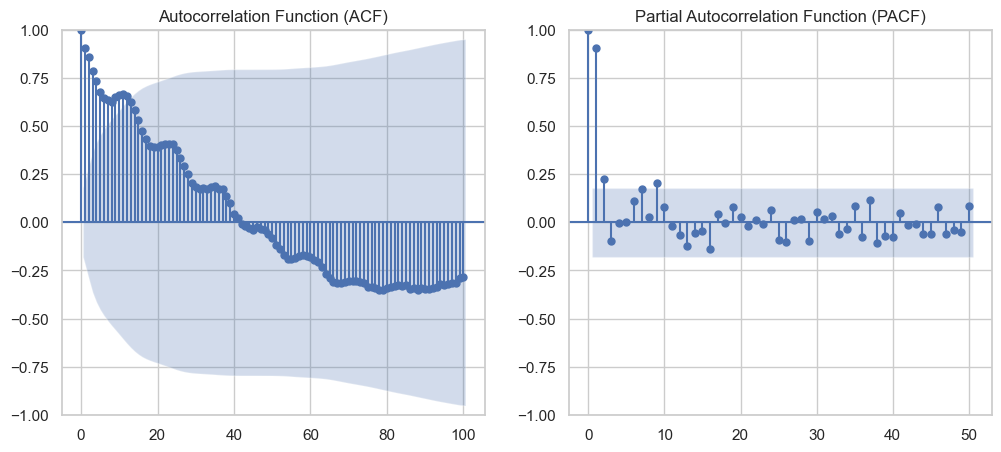

In [174]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Tracé des graphiques ACF et PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(data3, ax=axes[0], lags=100)
axes[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(data3, ax=axes[1], lags=50)
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.show()

### Interprétation des résultats de l'ACF et PACF

#### ACF (Autocorrelation Function) :
- Dans la plage d100 20 lags, on observe que la série décroît lentement vers 0. Cela indique une **dépendance à long terme** dans les données.
- Cette observation suggère que la série n'est pas **stationnaire**, car la figure ne présente pas de régularité.
- On remarque également que la série présente une **saisonnalité claire**.

#### PACF (Partial Autocorrelation Function) :
- On constate une chute nette à \( k = 5 \), ce qui suggère qu'un modèle **AR(5)** (modèle autorégressif d'ordre 5) serait le plus adapté pour décrire la structure de la série.
- Cette chute indique que l'autocorrélation partielle à \( k = 5 \) est significative, tandis que les autocorrélations pour des lags plus grands ne le sont pas. Cela suggère un modèle autorégressif simple avec un seul retard significatif.


#  Modélisation

## 🔹 **Illustration de la Différenciation**

📉 Test ADF après différenciation :
ADF Statistic : -6.506019
p-value :0.000000
Critical Values:
	1%: -3.494
	5%: -2.889
	10%: -2.582


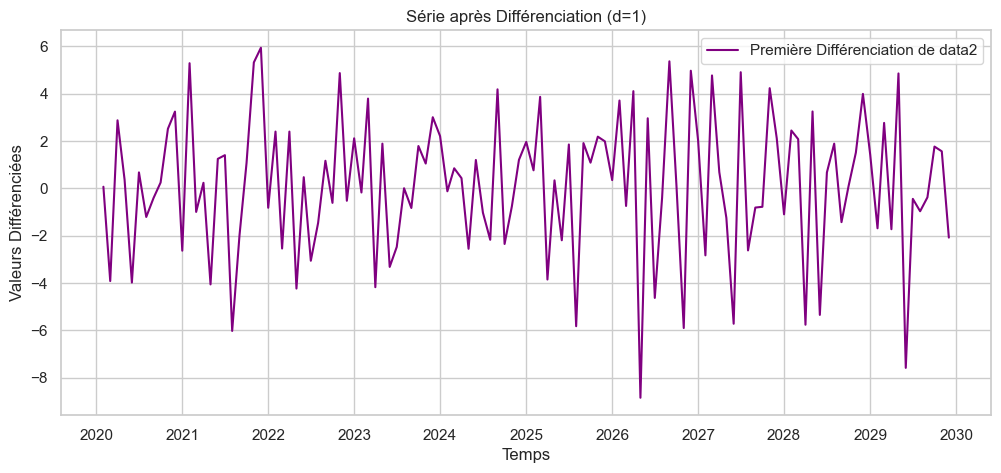

In [191]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 🟠 Appliquer la première différenciation sur la série non stationnaire
data_diff = data3.diff().dropna()

# 📉 Tester la stationnarité après différenciation
print("📉 Test ADF après différenciation :")
Stationnarite_test_adf(data2_diff)

# 📈 Visualisation de la série après différenciation
plt.figure(figsize=(12, 5))
plt.plot(data_diff, color='purple', label="Première Différenciation de data2")
plt.title("Série après Différenciation (d=1)")
plt.xlabel("Temps")
plt.ylabel("Valeurs Différenciées")
plt.legend()
plt.show()


La formule après différenciation est donnée par :

$$
\Delta y_t = \left( 10 + 0.2 \cdot t + 3 \cdot \sin\left(\frac{2\pi t}{12}\right) + \epsilon(t) \right) - \left( 10 + 0.2 \cdot (t-1) + 3 \cdot \sin\left(\frac{2\pi (t-1)}{12}\right) + \epsilon(t-1) \right)
$$

Cela donne :

$$
\Delta y_t = 0.2 + \epsilon(t) - \epsilon(t-1) + \left[ 3 \cdot \sin\left(\frac{2\pi t}{12}\right) - 3 \cdot \sin\left(\frac{2\pi (t-1)}{12}\right) \right]
$$




In [193]:
data_diff.mean()

0.13781248316058273

Il est autour de 0.2

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=477.217, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=406.605, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.42 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=450.211, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=407.796, Time=0.35 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=407.312, Time=0.39 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=413.404, Time=0.19 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=410.603, Time=0.47 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=429.602, Time=0.10 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=402.920, Time=0.19 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=449.529, Time=0.06 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=404.178, Time=0.42 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=403.518, Time=0.66 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=409.812, Time=0.30 sec
 ARIMA(2,1,0)(2,1,1)[12]             

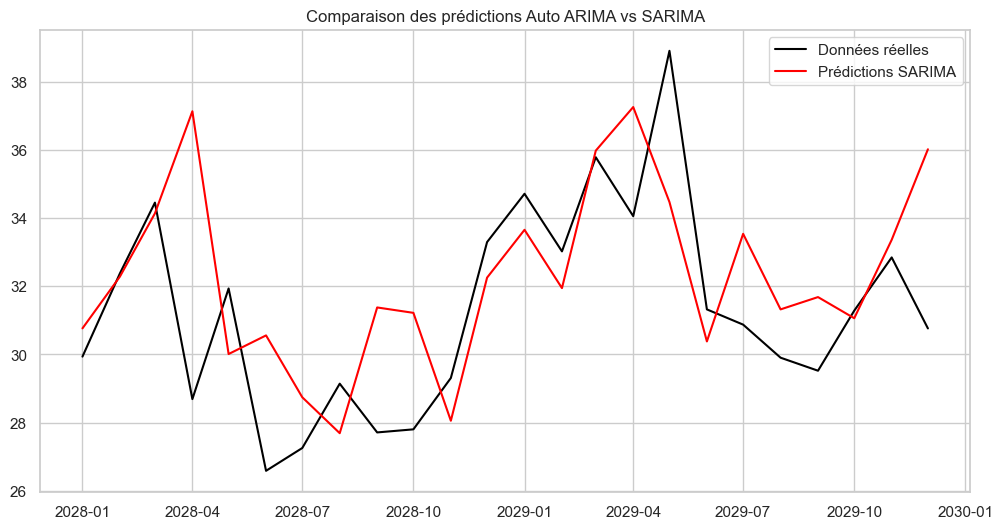


Résumé du modèle SARIMA:
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(3, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -191.073
Date:                            Sat, 22 Feb 2025   AIC                            392.147
Time:                                    20:06:13   BIC                            404.241
Sample:                                01-01-2020   HQIC                           397.006
                                     - 12-01-2027                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7517      0.109     -6.866      0.000      -0.966      -0.537
ar.L2    

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import pmdarima as pm



# Préparation des données
n = len(data3)
train_size = int(n * 0.8)
train_data = data3[:train_size]
test_data = data3[train_size:]

# Auto ARIMA pour trouver les meilleurs paramètres
auto_arima = pm.auto_arima(train_data,
                          seasonal=True,
                          m=12,  # période mensuelle
                          d=1,   # différenciation non-saisonnière
                          D=1,   # différenciation saisonnière
                          start_p=0, start_q=0,
                          max_p=10, max_q=10,
                          start_P=0, start_Q=0,
                          max_P=2, max_Q=2,
                          trace=True,
                          suppress_warnings=True)

# Récupérer les ordres du modèle auto_arima
order = auto_arima.order  # (p,d,q)
seasonal_order = auto_arima.seasonal_order  # (P,D,Q,s)

print(f"\nMeilleurs paramètres trouvés par auto_arima:")
print(f"Order (p,d,q): {order}")
print(f"Seasonal Order (P,D,Q,s): {seasonal_order}")

# Application du modèle SARIMA avec les paramètres d'auto_arima
sarima_model = sm.tsa.SARIMAX(train_data,
                             order=order,
                             seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit(disp=False)

# Prédictions

sarima_pred = sarima_fit.forecast(len(test_data))



sarima_rmse = np.sqrt(mean_squared_error(test_data, sarima_pred))

sarima_mse = mean_squared_error(test_data, sarima_pred)

sarima_mae = mean_absolute_error(test_data,  sarima_pred)

print("\nPerformances des modèles:")

print(f"RMSE SARIMA: {sarima_rmse:.2f}")

# Visualisation des résultats
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Données réelles', color='black')

plt.plot(test_data.index, sarima_pred, label='Prédictions SARIMA', color='red')
plt.title('Comparaison des prédictions Auto ARIMA vs SARIMA')
plt.legend()
plt.grid(True)
plt.show()

# Affichage du résumé du modèle SARIMA
print("\nRésumé du modèle SARIMA:")
print(sarima_fit.summary())

MAE : 8.27
RMSE : 2.88
MAPE : 2.13%


C:\Users\khali\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


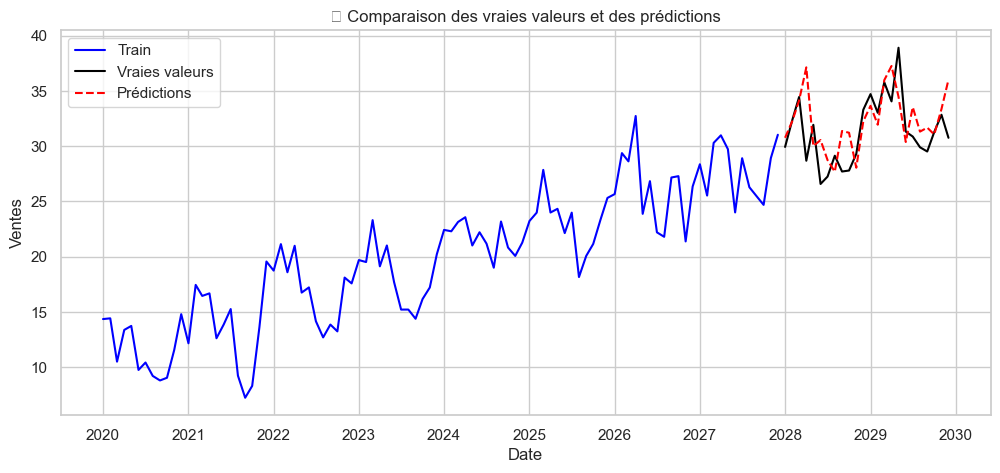

C:\Users\khali\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


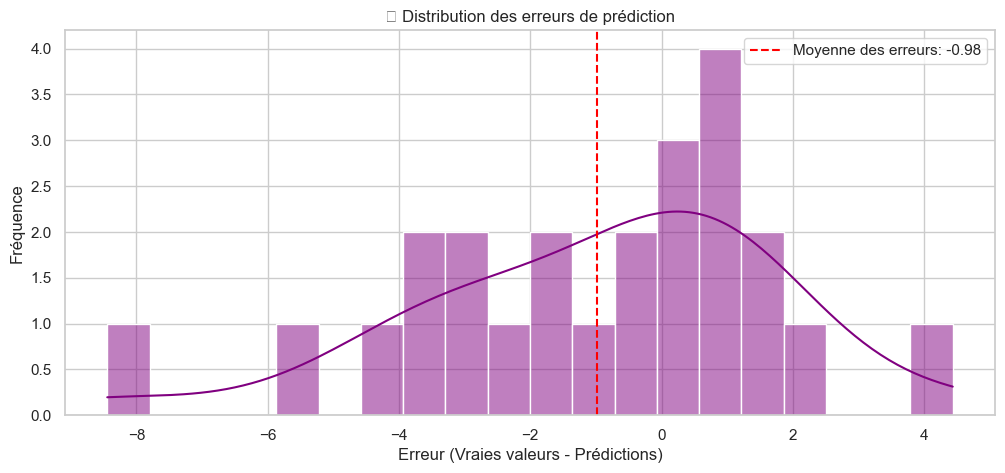

C:\Users\khali\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


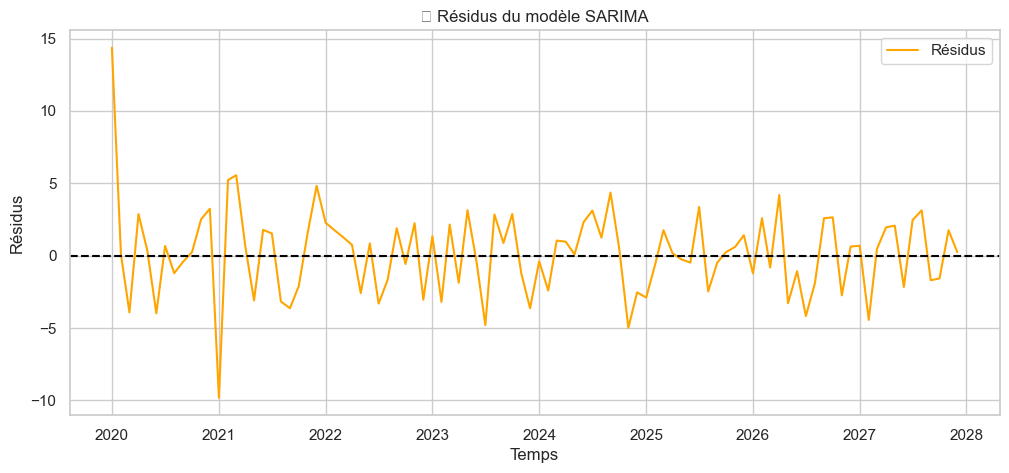

C:\Users\khali\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


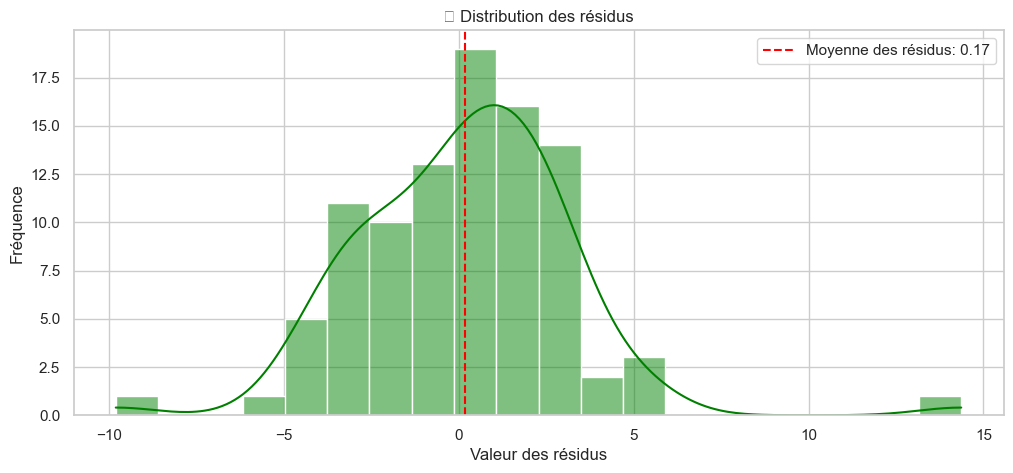

In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

# Affichage des métriques
print(f"MAE : {sarima_mse:.2f}")
print(f"RMSE : {sarima_rmse:.2f}")
print(f"MAPE : {sarima_mae:.2f}%")

test_data = test_data.copy()  # Pour éviter l'avertissement SettingWithCopyWarning
test_data_Prediction = sarima_pred
# 📊  Graphique des vraies valeurs vs. prédictions
plt.figure(figsize=(12, 5))
plt.plot(train_data.index, train_data, label='Train', color='blue')
plt.plot(test_data.index, test_data, label='Vraies valeurs', color='black')
plt.plot(test_data.index, test_data_Prediction, label='Prédictions', color='red', linestyle='dashed')
plt.legend()
plt.title("📈 Comparaison des vraies valeurs et des prédictions")
plt.xlabel("Date")
plt.ylabel("Ventes")
plt.show()

# 📊  Distribution des erreurs (Vraies valeurs - Prédictions)
errors = test_data - test_data_Prediction
plt.figure(figsize=(12, 5))
sns.histplot(errors, bins=20, kde=True, color='purple')
plt.axvline(errors.mean(), color='red', linestyle='dashed', label=f"Moyenne des erreurs: {errors.mean():.2f}")
plt.legend()
plt.title("📊 Distribution des erreurs de prédiction")
plt.xlabel("Erreur (Vraies valeurs - Prédictions)")
plt.ylabel("Fréquence")
plt.show()

# 📊 Analyse des résidus (différence entre les vraies valeurs et le modèle)
residuals = sarima_fit.resid
plt.figure(figsize=(12, 5))
plt.plot(residuals, label='Résidus', color='orange')
plt.axhline(0, color='black', linestyle='dashed')
plt.legend()
plt.title("📉 Résidus du modèle SARIMA")
plt.xlabel("Temps")
plt.ylabel("Résidus")
plt.show()

# 📊  Graphique des résidus en fonction du temps
plt.figure(figsize=(12, 5))
sns.histplot(residuals, bins=20, kde=True, color='green')
plt.axvline(residuals.mean(), color='red', linestyle='dashed', label=f"Moyenne des résidus: {residuals.mean():.2f}")
plt.legend()
plt.title("📉 Distribution des résidus")
plt.xlabel("Valeur des résidus")
plt.ylabel("Fréquence")
plt.show()


# Evaluation du modele

## 1.Premier graphique (Comparaison des vraies valeurs et prédictions) :


La ligne bleue représente les valeurs réelles
La ligne noire représente les prédictions
Les prédictions suivent assez bien la tendance générale des données réelles, ce qui est positif
Il y a une bonne capture des motifs saisonniers


## Distribution des erreurs de prédiction (graphique violet) :


La distribution semble approximativement normale (en forme de cloche)
Elle est centrée près de zéro, ce qui est bon signe
Il y a quelques valeurs extrêmes mais elles restent raisonnables
La forme générale suggère que les erreurs sont aléatoires et non systématiques


## Résidus du modèle SARIMA (graphique jaune) :


Les résidus oscillent autour de zéro
Il n'y a pas de tendance claire visible
L'amplitude des oscillations est relativement stable
Ceci suggère que le modèle capture bien la structure des données


## Distribution des résidus (graphique vert) :


La distribution suit approximativement une loi normale
Elle est symétrique et centrée autour de zéro
La courbe de densité s'ajuste bien à l'histogramme
C'est un bon indicateur de la qualité du modèle

## Dans l'ensemble, votre modèle SARIMA semble performant car :

Les prédictions suivent bien les données réelles
Les erreurs sont distribuées normalement
Les résidus sont stationnaires
Il n'y a pas de structure résiduelle évidente dans les erreurs

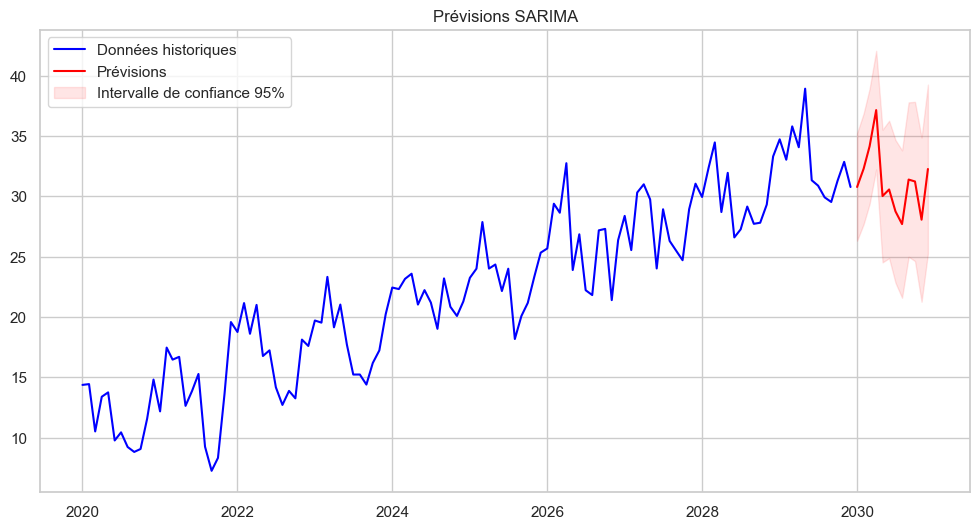


Valeurs prévues:
                 Date  Prévision  Limite inférieure  Limite supérieure
2028-01-01 2030-01-01  30.764797          26.310089          35.219505
2028-02-01 2030-02-01  32.283522          27.693545          36.873500
2028-03-01 2030-03-01  34.138814          29.367527          38.910100
2028-04-01 2030-04-01  37.134276          32.220674          42.047878
2028-05-01 2030-05-01  30.011464          24.514127          35.508802
2028-06-01 2030-06-01  30.557705          24.863189          36.252220
2028-07-01 2030-07-01  28.742493          22.827673          34.657313
2028-08-01 2030-08-01  27.688712          21.580705          33.796720
2028-09-01 2030-09-01  31.378067          24.981149          37.774986
2028-10-01 2030-10-01  31.219764          24.622690          37.816838
2028-11-01 2030-11-01  28.054211          21.250974          34.857449
2028-12-01 2030-12-01  32.253059          25.257484          39.248634


In [222]:
n_periods = 12  # Par exemple pour 12 mois

# Faire les prévisions
forecast = sarima_fit.forecast(steps=n_periods)

# Créer les dates futures pour l'axe x
last_date = data3.index[-1]
future_dates = pd.date_range(start=last_date, periods=n_periods + 1, freq='MS')[1:]

# Calculer les intervalles de confiance
forecast_conf = sarima_fit.get_forecast(steps=n_periods)
conf_int = forecast_conf.conf_int()

# Visualisation
plt.figure(figsize=(12, 6))

# Tracer les données historiques
plt.plot(data3.index, data3, label='Données historiques', color='blue')

# Tracer les prévisions
plt.plot(future_dates, forecast, label='Prévisions', color='red')

# Tracer les intervalles de confiance
plt.fill_between(future_dates,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='red',
                 alpha=0.1,
                 label='Intervalle de confiance 95%')

plt.title('Prévisions SARIMA')
plt.legend()
plt.grid(True)
plt.show()

# Afficher les valeurs prévues
print("\nValeurs prévues:")
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Prévision': forecast,
    'Limite inférieure': conf_int.iloc[:, 0],
    'Limite supérieure': conf_int.iloc[:, 1]
})
print(forecast_df)

---

# 3. J'ai créé ces données à partir des factures de consommation de ma maison.


In [235]:

dates = [
    "2021-10-15", "2021-11-15", "2021-12-15", "2022-01-15", "2022-02-15", "2022-03-15", "2022-04-15",
    "2022-05-15", "2022-06-15", "2022-07-15", "2022-08-15", "2022-09-15", "2022-10-15", "2022-11-15",
    "2022-12-15", "2023-01-15", "2023-02-15", "2023-03-15", "2023-04-15", "2023-05-15", "2023-06-15",
    "2023-07-15", "2023-08-15", "2023-09-15", "2023-10-15", "2023-11-15", "2023-12-15", "2024-01-15",
    "2024-02-15", "2024-03-15", "2024-04-15", "2024-05-15", "2024-06-15", "2024-07-15", "2024-08-15",
    "2024-09-15", "2024-10-15", "2024-11-15", "2024-12-15", "2025-01-15"
]

electricite = [
    38.02, 72.93, 141.94, 80.23, 82.59, 112.83, 119.22, 100.82, 75.05, 59.48, 43.57, 30.82,
    50.58, 78.78, 130.02, 159.57, 69.93, 76.40, 104.91, 77.54, 99.01, 74.87, 71.95, 89.67, 106.75,
    125.16, 92.31, 56.57, 68.01, 85.77, 82.32, 74.59, 76.02, 61.01, 69.82, 97.71, 160.01, 171.22,
    155.23, 80.10
]



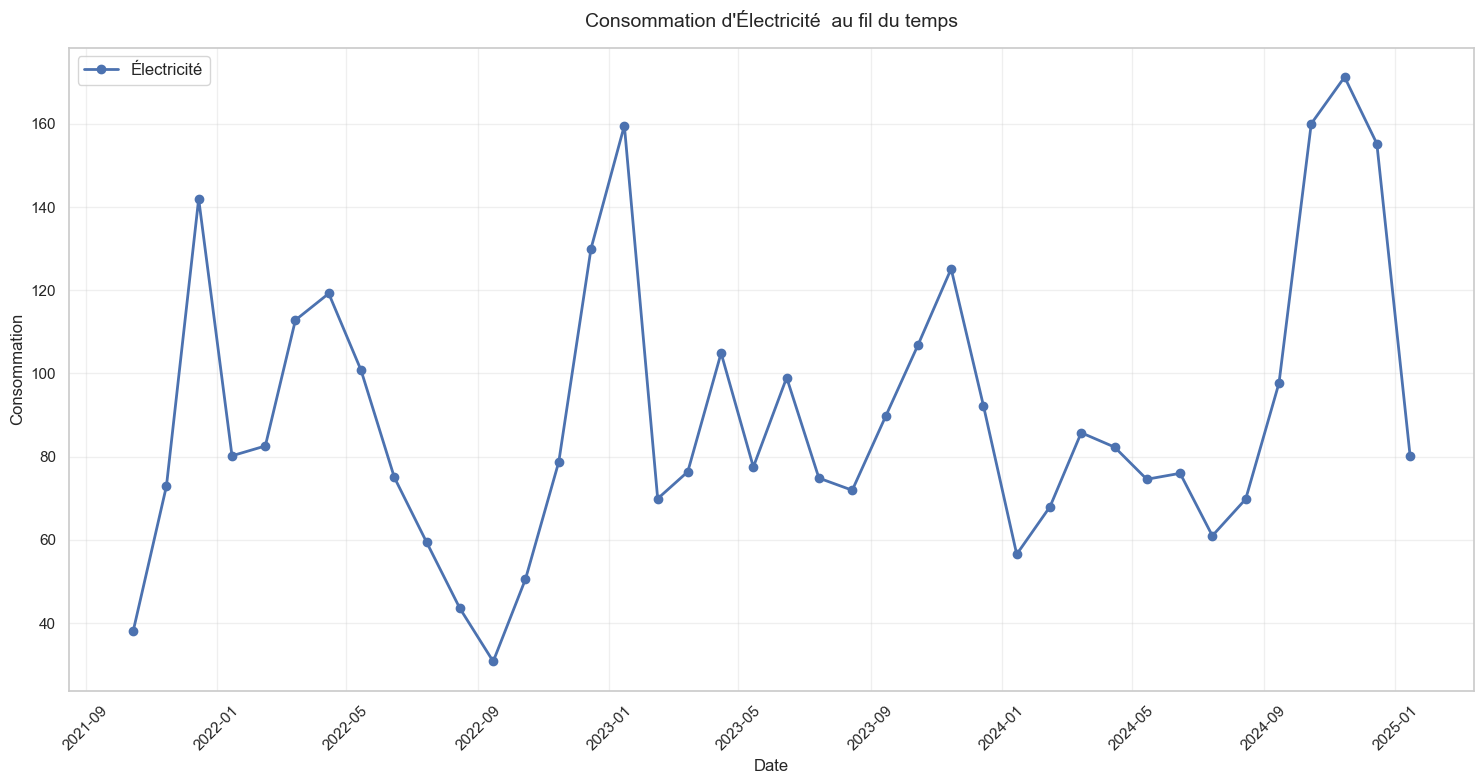


Aperçu des données :
            ELECTRICITE
2021-10-15        38.02
2021-11-15        72.93
2021-12-15       141.94
2022-01-15        80.23
2022-02-15        82.59


In [237]:
# Créer le DataFrame avec les dates comme index
data4 = pd.DataFrame({
    'ELECTRICITE': electricite,
}, index=pd.to_datetime(dates))

# Configuration du style de matplotlib

plt.figure(figsize=(15, 8))

# Création du graphique
plt.plot(data4.index, data4['ELECTRICITE'], label='Électricité', marker='o', linewidth=2)

# Personnalisation du graphique
plt.title('Consommation d\'Électricité  au fil du temps', fontsize=14, pad=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Consommation', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Rotation des dates pour une meilleure lisibilité
plt.xticks(rotation=45)

# Ajustement automatique de la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()

# Afficher les premières lignes du DataFrame avec les dates correctement formatées
print("\nAperçu des données :")
print(data.head())

In [239]:
# data.describe()
from statsmodels.stats.descriptivestats import describe
describe(data4)

,ELECTRICITE
nobs,40.000000
missing,0.000000
mean,90.083250
std_err,5.350543
upper_ci,100.570121
lower_ci,79.596379
std,33.839802
iqr,33.925000
iqr_normal,25.148640
mad,26.273062


## En calculant le nombre de bins, j'ai trouvé  k = 7.0768 , donc  k = 7 après arrondi.


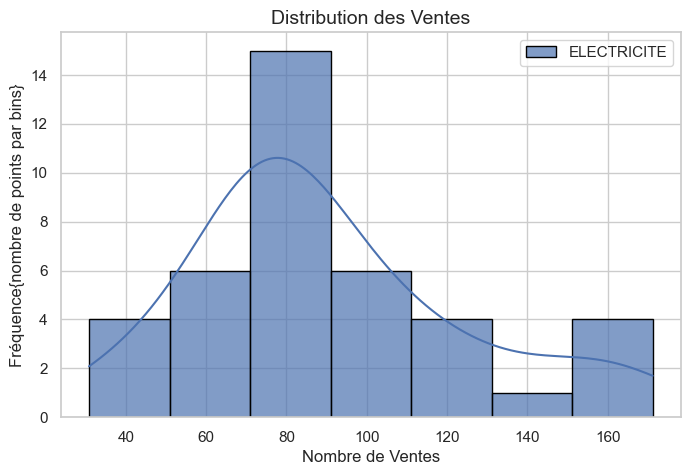

In [245]:
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(data4, kde=True, bins=7, color="royalblue", alpha=0.7, edgecolor="black")
plt.title("Distribution des Ventes", fontsize=14)
plt.xlabel("Nombre de Ventes", fontsize=12)
plt.ylabel("Fréquence{nombre de points par bins}", fontsize=12)
plt.show()

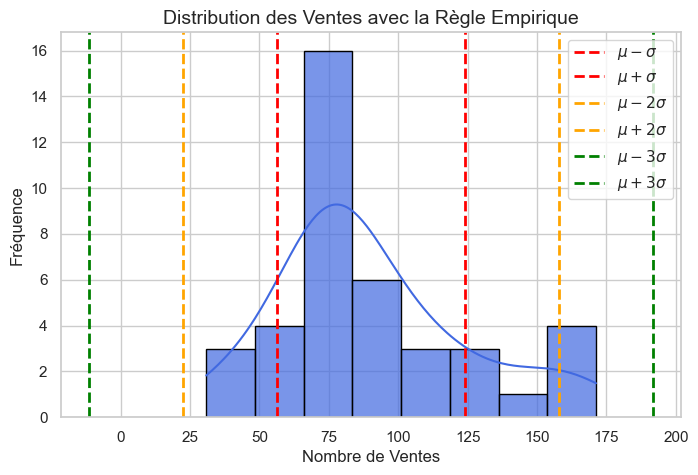

Proportion des données dans [μ - σ, μ + σ] : 0.7250 (Attendu : ~0.68)
✅ La distribution suit approximativement une loi normale selon la règle empirique.


In [249]:
mean = data4['ELECTRICITE'].mean()
std = data4['ELECTRICITE'].std()


sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))

sns.histplot(data4['ELECTRICITE'], kde=True, bins=8, color="royalblue", alpha=0.7, edgecolor="black")

plt.axvline(mean - std, color='red', linestyle='dashed', linewidth=2, label=r'$\mu - \sigma$')
plt.axvline(mean + std, color='red', linestyle='dashed', linewidth=2, label=r'$\mu + \sigma$')

plt.axvline(mean - 2*std, color='orange', linestyle='dashed', linewidth=2, label=r'$\mu - 2\sigma$')
plt.axvline(mean + 2*std, color='orange', linestyle='dashed', linewidth=2, label=r'$\mu + 2\sigma$')

plt.axvline(mean - 3*std, color='green', linestyle='dashed', linewidth=2, label=r'$\mu - 3\sigma$')
plt.axvline(mean + 3*std, color='green', linestyle='dashed', linewidth=2, label=r'$\mu + 3\sigma$')

plt.title("Distribution des Ventes avec la Règle Empirique", fontsize=14)
plt.xlabel("Nombre de Ventes", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.legend()
plt.show()

n = len(data4['ELECTRICITE'])
inside_1std = ((data4['ELECTRICITE'] >= (mean - std)) & (data4['ELECTRICITE'] <= (mean + std))).sum() / n

print(f"Proportion des données dans [μ - σ, μ + σ] : {inside_1std:.4f} (Attendu : ~0.68)")

if np.isclose(inside_1std, 0.68, atol=0.05):
    print("✅ La distribution suit approximativement une loi normale selon la règle empirique.")
else:
    print("⚠️ La distribution ne semble pas parfaitement normale.")


#  Analyse de stationnarité  (Tests ADF, KPSS)

In [254]:
Stationnarite_test_adf(data4)

ADF Statistic : -4.519351
p-value :0.000181
Critical Values:
	1%: -3.616
	5%: -2.941
	10%: -2.609


In [258]:
Stationnarite_test_kpss(data4)

KPSS Statistic : 0.158951
p-value :0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\khali\AppData\Local\Temp\ipykernel_18328\493224427.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result=kpss(data, regression='c')  # Le test peut être 'c' pour une stationnarité autour d'une constante,


#### • Les deux tests indiquent que notre série **est  stationnaire**.


# Analyse des Graphiques ACF et PACF


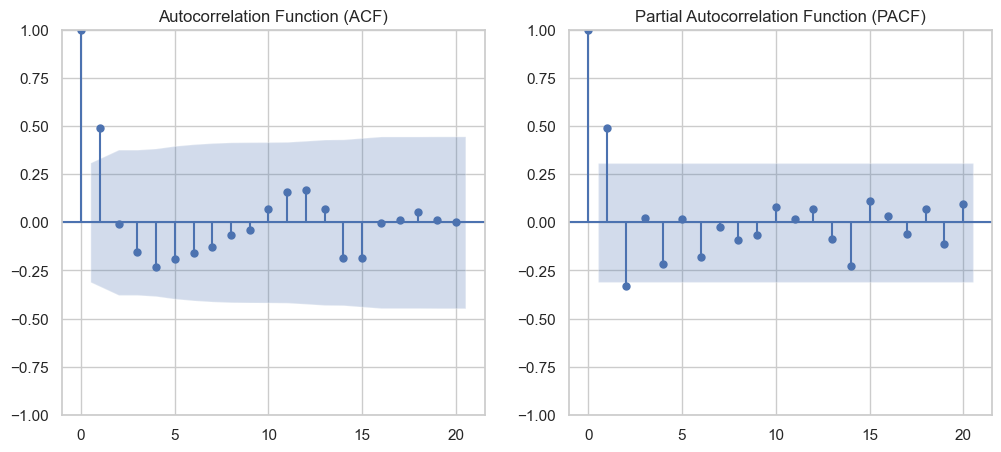

In [268]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Tracé des graphiques ACF et PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(data4, ax=axes[0], lags=20)
axes[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(data4, ax=axes[1], lags=20)
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.show()

C:\Users\khali\anaconda3\Lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)



Meilleurs paramètres trouvés par auto_arima:
Order (p,d,q): (2, 0, 1)


C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\khali\AppData\Local\Temp\ipykernel_18328\1941342220.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=last_date, periods=future_steps + 1, 

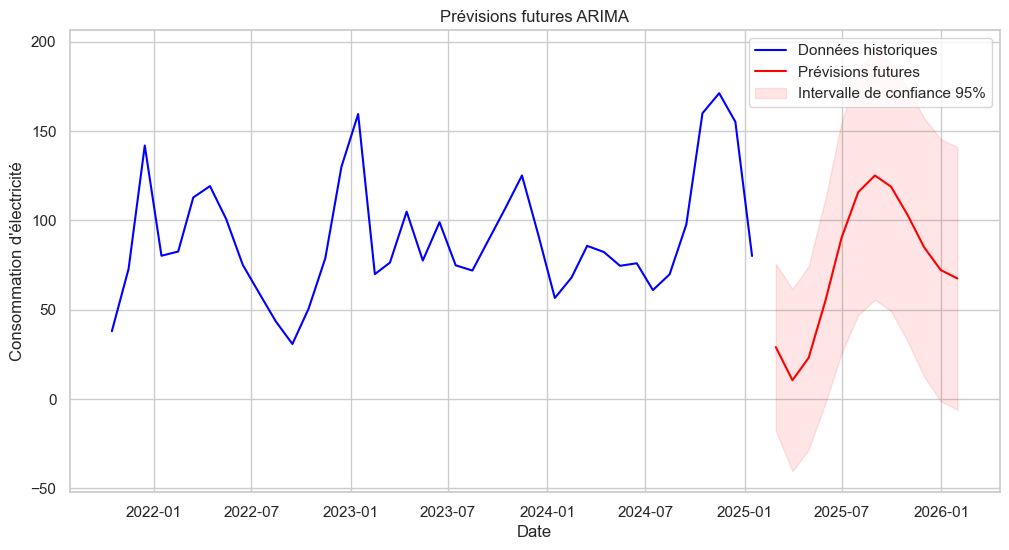


Prévisions futures:
         Date   Prévision  Limite inférieure  Limite supérieure
40 2025-02-28   29.107813         -17.637896          75.853523
41 2025-03-31   10.534270         -40.418841          61.487380
42 2025-04-30   23.072537         -28.316893          74.461968
43 2025-05-31   54.861854          -2.317853         112.041562
44 2025-06-30   90.168489          25.510360         154.826619
45 2025-07-31  115.813189          47.014227         184.612151
46 2025-08-31  125.160809          55.609640         194.711977
47 2025-09-30  118.864610          49.232684         188.496537
48 2025-10-31  102.885567          32.122447         173.648686
49 2025-11-30   85.133805          12.761583         157.506027
50 2025-12-31   72.236721          -1.094691         145.568134
51 2026-01-31   67.532293          -5.978542         141.043129

Résumé du modèle ARIMA:
                               SARIMAX Results                                
Dep. Variable:            ELECTRICITE   No.

In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA

# Auto ARIMA pour trouver les meilleurs paramètres
auto_arima = pm.auto_arima(data4,
                          seasonal=False,
                          m=12,  # période mensuelle
                          error_action='ignore',
                          suppress_warnings=True)

# Récupérer les ordres du modèle auto_arima
order = auto_arima.order  # (p,d,q)
print(f"\nMeilleurs paramètres trouvés par auto_arima:")
print(f"Order (p,d,q): {order}")

# Création et ajustement du modèle ARIMA
arima_model = ARIMA(data4['ELECTRICITE'], order=order)  
arima_results = arima_model.fit()

# Définir l'horizon de prévision future (par exemple 12 mois dans le futur)
future_steps = 12

# Générer les dates futures
last_date = data4.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='M')[1:]

# Faire les prévisions futures
future_forecast = arima_results.forecast(steps=future_steps)

# Créer un DataFrame pour les prévisions futures
future_forecast_df = pd.DataFrame({
    'Forecast': future_forecast
}, index=future_dates)

# Calculer les intervalles de confiance
forecast_conf = arima_results.get_forecast(steps=future_steps)
conf_int = forecast_conf.conf_int()

# Visualisation
plt.figure(figsize=(12, 6))

# Tracer les données historiques
plt.plot(data4.index, data4['ELECTRICITE'], label='Données historiques', color='blue')

# Tracer les prévisions futures
plt.plot(future_dates, future_forecast, label='Prévisions futures', color='red')

# Tracer les intervalles de confiance
plt.fill_between(future_dates,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='red',
                 alpha=0.1,
                 label='Intervalle de confiance 95%')

plt.title('Prévisions futures ARIMA')
plt.xlabel('Date')
plt.ylabel('Consommation d\'électricité')
plt.legend()
plt.grid(True)
plt.show()

# Afficher les résultats des prévisions
print("\nPrévisions futures:")
results_df = pd.DataFrame({
    'Date': future_dates,
    'Prévision': future_forecast,
    'Limite inférieure': conf_int.iloc[:, 0],
    'Limite supérieure': conf_int.iloc[:, 1]
})
print(results_df)

# Évaluation du modèle
print("\nRésumé du modèle ARIMA:")
print(arima_results.summary())

C:\Users\khali\anaconda3\Lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=479.950, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=396.232, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=398.054, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=397.883, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=398.580, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=386.596, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=395.282, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=382.948, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=384.725, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=379.102, Time=0.26 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=383.543, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=380.941, Time=0.54 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=387.489, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=385.545, 

C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\User

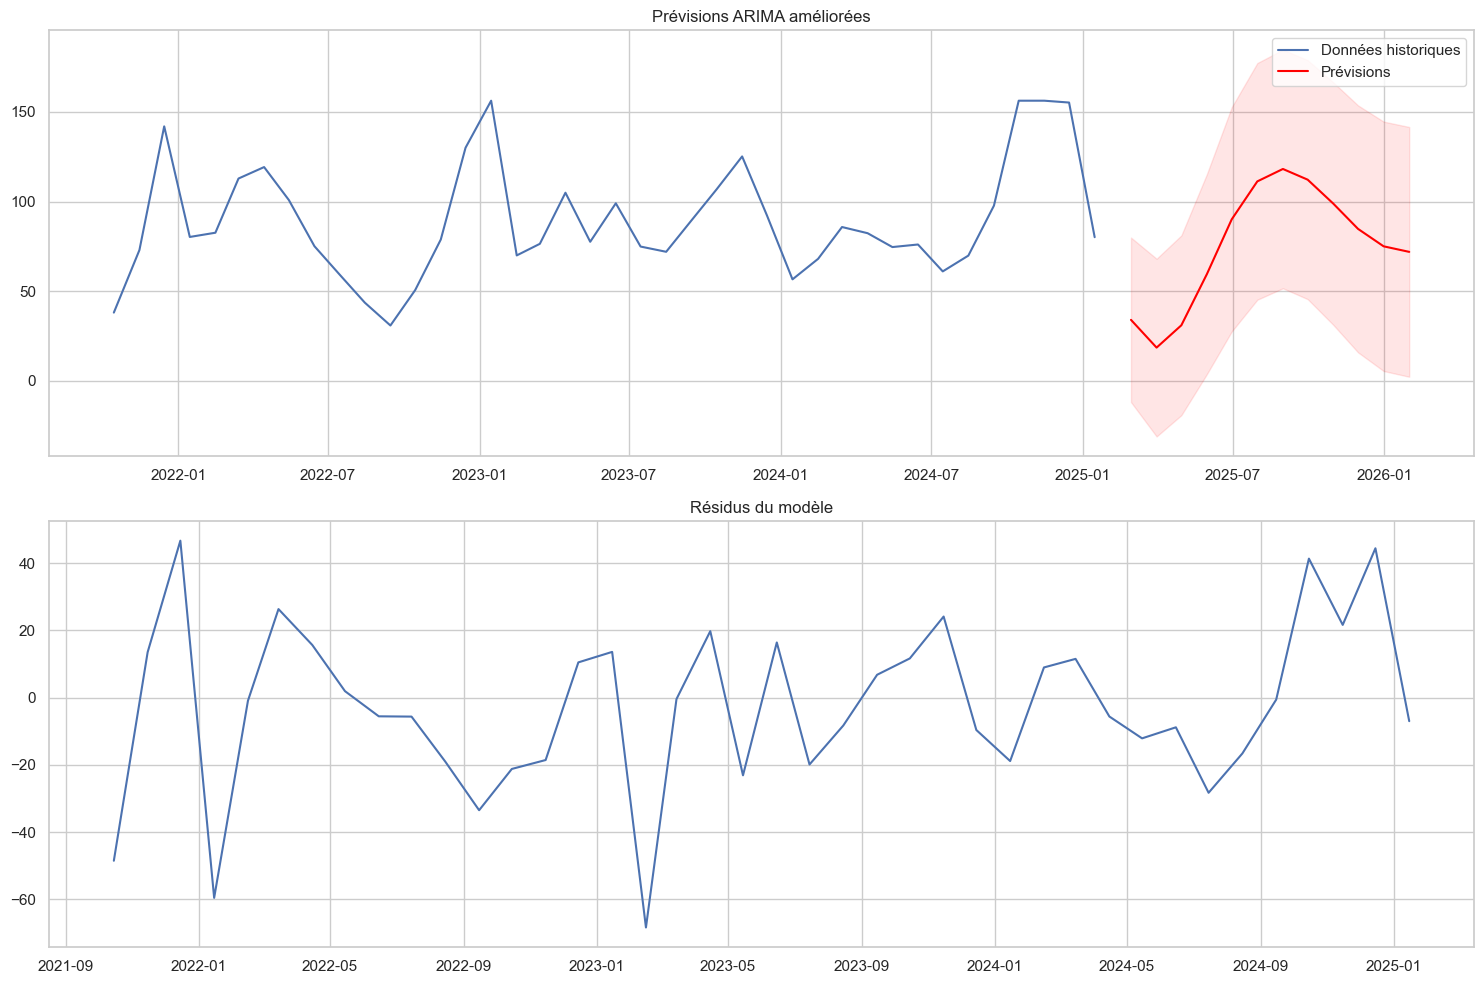

In [294]:
from scipy import stats
# 1. Préparation et analyse des données
def prepare_data(data):
    # Vérifier et traiter les valeurs manquantes
    data = data.interpolate(method='linear')
    
    # Détecter et traiter les outliers avec la méthode IQR
    Q1 = data['ELECTRICITE'].quantile(0.25)
    Q3 = data['ELECTRICITE'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remplacer les outliers par les bornes
    data.loc[data['ELECTRICITE'] < lower_bound, 'ELECTRICITE'] = lower_bound
    data.loc[data['ELECTRICITE'] > upper_bound, 'ELECTRICITE'] = upper_bound
    
    return data

# 2. Sélection optimisée des paramètres
def optimize_parameters(data):
    # Grid search pour les paramètres d'auto_arima
    auto_arima = pm.auto_arima(data,
                              start_p=0, max_p=10,
                              start_q=0, max_q=10,
                              m=12,
                              seasonal=False,
                              d=None, D=None,  # Laisser auto_arima déterminer d et D
                              trace=True,
                              error_action='ignore',
                              suppress_warnings=True,
                              stepwise=True,
                              information_criterion='aic')
    
    return auto_arima.order, auto_arima.seasonal_order

# 3. Validation croisée temporelle
def time_series_cv(data, order, n_splits=5):
    cv_scores = []
    length = len(data)
    split_size = length // n_splits
    
    for i in range(n_splits-1):
        train = data.iloc[:split_size*(i+1)]
        test = data.iloc[split_size*(i+1):split_size*(i+2)]
        
        model = ARIMA(train, order=order)
        results = model.fit()
        
        forecast = results.forecast(steps=len(test))
        rmse = np.sqrt(mean_squared_error(test, forecast))
        cv_scores.append(rmse)
    
    return np.mean(cv_scores), np.std(cv_scores)

# 4. Évaluation complète du modèle
def evaluate_model(actual, predicted):
    results = {
        'RMSE': np.sqrt(mean_squared_error(actual, predicted)),
        'MAE': mean_absolute_error(actual, predicted),
        'R2': r2_score(actual, predicted),
        'MAPE': np.mean(np.abs((actual - predicted) / actual)) * 100
    }
    return results

# 5. Diagnostic des résidus
def residuals_analysis(model_results):
    residuals = model_results.resid
    
    # Tests statistiques
    shapiro_stat, shapiro_p = stats.shapiro(residuals)
    ljung_box = sm.stats.diagnostic.acorr_ljungbox(residuals, lags=[10], return_df=True)
    
    return {
        'shapiro_test': {'statistic': shapiro_stat, 'p_value': shapiro_p},
        'ljung_box_test': ljung_box
    }

# Application principale
def improved_arima_forecast(data4, future_steps=12):
    # Préparation des données
    data_cleaned = prepare_data(data4)
    
    # Optimisation des paramètres
    order, seasonal_order = optimize_parameters(data_cleaned['ELECTRICITE'])
    
    # Validation croisée
    cv_mean, cv_std = time_series_cv(data_cleaned['ELECTRICITE'], order)
    
    # Entraînement du modèle final
    model = ARIMA(data_cleaned['ELECTRICITE'], order=order)
    results = model.fit()
    
    # Prévisions futures
    forecast = results.forecast(steps=future_steps)
    
    # Intervalles de confiance
    forecast_conf = results.get_forecast(steps=future_steps)
    conf_int = forecast_conf.conf_int()
    
    # Évaluation et diagnostics
    residuals_diagnostics = residuals_analysis(results)
    
    # Visualisation
    plt.figure(figsize=(15, 10))
    
    # Subplot 1: Prévisions
    plt.subplot(2, 1, 1)
    plt.plot(data_cleaned.index, data_cleaned['ELECTRICITE'], label='Données historiques')
    plt.plot(pd.date_range(start=data_cleaned.index[-1], periods=future_steps+1, freq='M')[1:],
             forecast, label='Prévisions', color='red')
    plt.fill_between(pd.date_range(start=data_cleaned.index[-1], periods=future_steps+1, freq='M')[1:],
                     conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                     color='red', alpha=0.1)
    plt.title('Prévisions ARIMA améliorées')
    plt.legend()
    
    # Subplot 2: Diagnostic des résidus
    plt.subplot(2, 1, 2)
    plt.plot(results.resid)
    plt.title('Résidus du modèle')
    plt.tight_layout()
    plt.show()
    
    return forecast, conf_int, residuals_diagnostics

# Utilisation
forecast, conf_int, diagnostics = improved_arima_forecast(data4)